In [1]:
# Environment detection and unified paths (Colab + Local)
import os, sys
from pathlib import Path

def _is_colab():
    return 'google.colab' in sys.modules

def _find_repo_root(start: Path, markers=("src", "data")) -> Path:
    p = start.resolve()
    for _ in range(6):  # search up to 6 levels up
        if all((p / m).exists() for m in markers):
            return p
        if p.parent == p:
            break
        p = p.parent
    return start.resolve()

# Current working dir inside notebooks/ usually; find repo root
CWD = Path.cwd()
REPO_ROOT = _find_repo_root(CWD)
IS_COLAB = _is_colab()

# Colab-specific override if Drive is mounted and this project path exists
COLAB_DRIVE_ROOT = Path('/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1')
if IS_COLAB and COLAB_DRIVE_ROOT.exists():
    REPO_ROOT = COLAB_DRIVE_ROOT

DATA_ROOT = REPO_ROOT / 'data'
PATCHES_ROOT = DATA_ROOT / 'patches_512'
MODEL_DIR = REPO_ROOT / 'models'
LOGS_DIR = REPO_ROOT / 'logs'
MODEL_DIR.mkdir(parents=True, exist_ok=True)
LOGS_DIR.mkdir(parents=True, exist_ok=True)

print(f'Repo root: {REPO_ROOT}')
print(f'Data root: {DATA_ROOT}')
print(f'Patches root: {PATCHES_ROOT}')
print(f'Model dir: {MODEL_DIR}')
print(f'Logs dir: {LOGS_DIR}')

Repo root: /content
Data root: /content/data
Patches root: /content/data/patches_512
Model dir: /content/models
Logs dir: /content/logs


The notebook was run on Google Colab.

# Getting the dataset

In [2]:
!pip install patchify
!pip install --upgrade torch torchvision torchaudio -f https://download.pytorch.org/whl/cu118/torch_stable.html
!pip install --upgrade timm segmentation-models-pytorch

Looking in links: https://download.pytorch.org/whl/cu118/torch_stable.html
  Using cached torch-2.9.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.24.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (5.9 kB)
  Using cached torchaudio-2.9.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.9 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1

In [3]:
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-venv python3.9-dev -y


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,817 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,288 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 https:/

In [4]:
!python3.9 -m venv py39


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
project_path = "/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1"
os.chdir(project_path)
print(os.listdir())


['deepglobe-land-cover-classification-dataset.zip', 'landcoverai.zip', 'requirements.txt', 'Dockerfile', '.gitignore', 'LICENSE', '.gitattributes', 'OPTIMIZATION_SUMMARY.md', '.DS_Store', 'notebooks', 'src', '.git', 'assets', 'logs', '.github', 'output', '.venv', 'data', 'models', 'config', 'py39', 'kaggle.json', 'kaggle (1).json', 'kaggle (2).json', 'kaggle (3).json', 'kaggle (4).json', 'kaggle (5).json', 'kaggle (6).json', 'kaggle (7).json', 'kaggle (8).json']


In [7]:

!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-venv python3.9-dev -y

# 2️⃣ Create a clean Python 3.9 virtual environment
!python3.9 -m venv /content/py39

# 3️⃣ Activate and upgrade pip inside it
!source /content/py39/bin/activate && pip install --upgrade pip setuptools wheel

# 4️⃣ Install all your dependencies from requirements.txt
!source /content/py39/bin/activate && pip install -r requirements.txt


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [8]:
! pip install -q kaggle

In [9]:
# upload the .json file for your kaggle profile credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (9).json


{'kaggle (9).json': b'{"username":"srikanthakkaru","key":"68c10d1c457ecd877c619a1dab2044eb"}'}

In [10]:
!ls -lh /content


total 20K
drwx------ 5 root root 4.0K Oct 23 21:42 drive
drwxr-xr-x 2 root root 4.0K Oct 23 21:37 logs
drwxr-xr-x 2 root root 4.0K Oct 23 21:37 models
drwxr-xr-x 6 root root 4.0K Oct 23 21:43 py39
drwxr-xr-x 1 root root 4.0K Oct 22 13:39 sample_data


In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -lh ~/.kaggle/


total 4.0K
-rw------- 1 root root 70 Oct 23 21:44 kaggle.json


In [12]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
# ! kaggle datasets list

In [14]:
! kaggle datasets download -d adrianboguszewski/landcoverai

Dataset URL: https://www.kaggle.com/datasets/adrianboguszewski/landcoverai
License(s): CC-BY-NC-SA-4.0
landcoverai.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
! kaggle datasets download -d balraj98/deepglobe-land-cover-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/balraj98/deepglobe-land-cover-classification-dataset
License(s): other
deepglobe-land-cover-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
# ! rm -rf landcoverai

In [17]:
# Extract LandCover.ai dataset locally (Python, not shell)
import os, zipfile
os.makedirs('data', exist_ok=True)
if os.path.exists('landcoverai.zip'):
    with zipfile.ZipFile('landcoverai.zip', 'r') as zf:
        zf.extractall('data')
    print('Extracted LandCover.ai to data/')
else:
    print("landcoverai.zip not found in current directory. Make sure the Kaggle download succeeded.")

Extracted LandCover.ai to data/


In [ ]:
# Download and extract DeepGlobe Land Cover dataset via Kaggle
import os, zipfile, glob

DEEPGLOBE_SLUG = os.environ.get('DEEPGLOBE_SLUG', 'balraj98/deepglobe-land-cover-classification-dataset')  # change if needed
DATA_DIR = 'data'
EXTRACT_DIR = os.path.join(DATA_DIR, 'deepglobe')

def check_deepglobe_exists():
    """Check if DeepGlobe data already exists and is valid"""
    if not os.path.exists(EXTRACT_DIR):
        return False

    # Check for some expected files/folders in DeepGlobe dataset
    expected_items = ['train', 'valid', 'test']  # Common DeepGlobe folders
    for item in expected_items:
        item_path = os.path.join(EXTRACT_DIR, item)
        if os.path.exists(item_path):
            # Check if the folder has content
            if os.listdir(item_path):
                print(f"✓ DeepGlobe data already exists in {EXTRACT_DIR}")
                return True

    print("DeepGlobe directory exists but appears empty or incomplete")
    return False

def download_and_extract():
    """Download and extract dataset only if it doesn't exist"""

    # Skip if data already exists
    if check_deepglobe_exists():
        print("Skipping download - data already exists")
        return True

    # Create data directory
    os.makedirs(DATA_DIR, exist_ok=True)

    # Download dataset
    zip_path = os.path.join(DATA_DIR, f"{DEEPGLOBE_SLUG.split('/')[-1]}.zip")

    # Skip if zip file already exists
    if os.path.exists(zip_path):
        print(f"Zip file already exists: {zip_path}")
    else:
        print(f"Downloading DeepGlobe dataset from Kaggle...")
        ret = os.system(f"kaggle datasets download -d {DEEPGLOBE_SLUG} -p {DATA_DIR}")
        if ret != 0:
            print("Kaggle download for DeepGlobe failed. Set DEEPGLOBE_SLUG to a valid Kaggle dataset slug or manually place the zip under data/.")
            return False

    # Extract dataset
    os.makedirs(EXTRACT_DIR, exist_ok=True)

    for zp in glob.glob(os.path.join(DATA_DIR, '*.zip')):
        try:
            print(f'Extracting {os.path.basename(zp)} to {EXTRACT_DIR}')
            with zipfile.ZipFile(zp, 'r') as zf:
                zf.extractall(EXTRACT_DIR)
            print(f'✓ Successfully extracted {os.path.basename(zp)}')

            # Verify extraction was successful
            if check_deepglobe_exists():
                # Optional: Clean up zip file after successful extraction
                # os.remove(zp)
                # print(f"Removed zip file: {zp}")
                return True
            else:
                print("Extraction completed but data appears incomplete")
                return False

        except zipfile.BadZipFile:
            print(f'✗ Skipped bad zip file: {zp}')
        except Exception as e:
            print(f'✗ Error extracting {zp}: {e}')

    return False

# Alternative manual check function
def is_dataset_ready():
    """Quick check if dataset is ready to use"""
    required_folders = ['train', 'valid', 'test']
    for folder in required_folders:
        folder_path = os.path.join(EXTRACT_DIR, folder)
        if not os.path.exists(folder_path) or not os.listdir(folder_path):
            return False
    return True

# Main execution
if __name__ == "__main__":
    print("Setting up DeepGlobe dataset...")

    if is_dataset_ready():
        print("✓ DeepGlobe dataset is already set up and ready!")
    else:
        success = download_and_extract()
        if success:
            print("✓ DeepGlobe dataset setup completed successfully!")
        else:
            print("✗ Failed to set up DeepGlobe dataset")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Setting up DeepGlobe dataset...
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-2907831208.py", line 94, in <cell line: 0>
    success = download_and_extract()
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2907831208.py", line 35, in download_and_extract
    os.makedirs(DATA_DIR, exist_ok=True)
  File "<frozen os>", line 225, in makedirs
OSError: [Errno 107] Transport endpoint is not connected: 'data'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, ano

In [163]:
from pathlib import Path
import os, cv2, numpy as np, shutil
import time

# --- Paths ---
deepglobe_root = Path("data/deepglobe")
out_root = Path("data/deepglobe_converted")
(out_root / "images").mkdir(parents=True, exist_ok=True)
(out_root / "masks").mkdir(parents=True, exist_ok=True)

# --- DeepGlobe RGB Color to Class Mapping ---
DEEPGLOBE_COLORS = {
    (0, 255, 255): 0,   # urban_land - cyan
    (255, 255, 0): 1,   # agriculture_land - yellow
    (255, 0, 255): 2,   # rangeland - magenta
    (0, 255, 0): 3,     # forest_land - green
    (0, 0, 255): 4,     # water - blue
    (255, 255, 255): 5, # barren_land - white
    (0, 0, 0): 6,       # unknown - black
}

# --- Mapping to LandCoverAI classes ---
DG_TO_LCAI = {
    0: 0,  # urban_land → background
    1: 0,  # agriculture_land → background
    2: 0,  # rangeland → background
    3: 2,  # forest_land → woodland
    4: 3,  # water → water
    5: 0,  # barren_land → background
    6: 0,  # unknown → background
}

def rgb_to_class_mask(rgb_mask):
    """Convert RGB mask to class labels"""
    h, w = rgb_mask.shape[:2]
    class_mask = np.zeros((h, w), dtype=np.uint8)

    for color, class_id in DEEPGLOBE_COLORS.items():
        mask = (rgb_mask == np.array(color, dtype=np.uint8)).all(axis=2)
        class_mask[mask] = class_id

    for dg_class, lcai_class in DG_TO_LCAI.items():
        class_mask[class_mask == dg_class] = lcai_class

    return class_mask


def convert_mask_to_lcai(mask_path: Path, out_path: Path):
    """Convert DeepGlobe RGB mask to LandCoverAI-compatible mask"""
    if out_path.exists():
        return True  # skip existing

    try:
        m = cv2.imread(str(mask_path), cv2.IMREAD_COLOR)
        if m is None:
            print(f"Could not read mask: {mask_path}")
            return False

        m_rgb = cv2.cvtColor(m, cv2.COLOR_BGR2RGB)
        out = rgb_to_class_mask(m_rgb)

        unique_vals = np.unique(out)
        if any(v > 3 for v in unique_vals):
            print(f"Invalid output values in {out_path}: {unique_vals}")
            return False

        success = cv2.imwrite(str(out_path), out)
        if not success:
            print(f"Could not write mask: {out_path}")
        return success

    except Exception as e:
        print(f"Error processing {mask_path}: {e}")
        return False


def main():
    start_time = time.time()
    copied, total_images = 0, 0

    print("Scanning for images...")

    for subset in ['train', 'valid', 'test']:
        subset_path = deepglobe_root / subset
        if not subset_path.exists():
            print(f"Skipping missing subset: {subset}")
            continue

        subset_images = [f for f in os.listdir(subset_path) if f.endswith('_sat.jpg')]
        total_images += len(subset_images)
        print(f"Processing {len(subset_images)} images in {subset}...")

        for i, fname in enumerate(subset_images):
          img_path = subset_path / fname
          mask_path = subset_path / fname.replace('_sat.jpg', '_mask.png')

          if not mask_path.exists():
              continue

          new_name = f"{subset}_{fname.replace('_sat.jpg', '.tif')}"
          img_out = out_root / "images" / new_name
          mask_out = out_root / "masks" / new_name

          # ✅ Skip if both already exist
          if img_out.exists() and mask_out.exists():
              print(f" Skipping existing pair: {new_name}")
              continue

          try:
              # Copy image only if missing
              if not img_out.exists():
                  shutil.copy2(img_path, img_out)

              # Convert mask if missing or invalid
              if not mask_out.exists():
                  if convert_mask_to_lcai(mask_path, mask_out):
                      copied += 1
                  else:
                      print(f"  Mask conversion failed: {mask_path}")
                      if img_out.exists():
                          img_out.unlink()  # delete image if mask failed
              else:
                  print(f"Mask already exists for: {new_name}")

          except Exception as e:
              print(f" Failed to process {fname}: {e}")

          if (i + 1) % 100 == 0 or (i + 1) == len(subset_images):
              print(f"{subset}: {i+1}/{len(subset_images)} processed")


    elapsed = time.time() - start_time
    print(f"\nPrepared {copied}/{total_images} image/mask pairs")
    print(f"Time taken: {elapsed:.2f} seconds")
    if copied < total_images:
        print(f"{total_images - copied} pairs skipped or failed")


if __name__ == "__main__":
    main()


OSError: [Errno 107] Transport endpoint is not connected: 'data/deepglobe_converted/images'

In [20]:
!find /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted -type f | head -20


/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_457982.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_457070.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_457265.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_471930.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_467855.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_470446.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_458776.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images/train_461001.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segme

In [21]:
from patchify import patchify
from pathlib import Path
import cv2, os
from tqdm import tqdm
import numpy as np

# --- CONFIGURATION ---
base_path = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data")
tile_dimension = 512

deepglobe_conv = base_path / "deepglobe_converted"
dg_img_dir = deepglobe_conv / "images"
dg_mask_dir = deepglobe_conv / "masks"

# Output directories
dg_patches_img = base_path / f"patches_{tile_dimension}" / "images_dg"
dg_patches_msk = base_path / f"patches_{tile_dimension}" / "masks_dg"
dg_patches_img.mkdir(parents=True, exist_ok=True)
dg_patches_msk.mkdir(parents=True, exist_ok=True)


def directory_has_patches(out_dir):
    """Return True if any patch files exist in the directory."""
    return any(out_dir.glob("*.tif")) or any(out_dir.glob("*.png"))


def create_patches_dir(src_dir, out_dir, tile_size, patch_type="image"):
    """Create patches from source directory. Skip existing patches."""
    src_dir = Path(src_dir)
    out_dir = Path(out_dir)

    image_files = []
    for ext in ['.tif', '.png', '.jpg', '.jpeg', '.tiff']:
        image_files.extend(src_dir.glob(f'*{ext}'))
        image_files.extend(src_dir.glob(f'*{ext.upper()}'))

    if not image_files:
        print(f"No image files found in {src_dir}")
        return 0, 0

    total_patches = 0
    skipped_files = 0

    print(f"Processing {len(image_files)} files from {src_dir.name}...")

    for file_path in tqdm(image_files, desc=f"Creating {patch_type} patches"):
        base_name = file_path.stem

        # ✅ Skip if patches already exist for this file
        existing_patches = list(out_dir.glob(f"{base_name}_patch_*_*.tif"))
        if existing_patches:
            skipped_files += 1
            total_patches += len(existing_patches)
            continue

        try:
            # Read image
            if patch_type == "mask":
                img = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
            else:
                img = cv2.imread(str(file_path), cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            if img is None:
                print(f"Could not read {file_path}")
                continue

            h, w = img.shape[:2]
            max_h, max_w = (h // tile_size) * tile_size, (w // tile_size) * tile_size

            if max_h == 0 or max_w == 0:
                print(f"Image {file_path.name} too small for tile size {tile_size}")
                continue

            img = img[:max_h, :max_w]

            # Patchify
            if patch_type == "mask":
                patches = patchify(img, (tile_size, tile_size), step=tile_size)
                for i in range(patches.shape[0]):
                    for j in range(patches.shape[1]):
                        patch = patches[i, j]
                        cv2.imwrite(str(out_dir / f"{base_name}_patch_{i}_{j}.tif"), patch)
                        total_patches += 1
            else:
                patches = patchify(img, (tile_size, tile_size, img.shape[2]), step=tile_size)
                for i in range(patches.shape[0]):
                    for j in range(patches.shape[1]):
                        patch = patches[i, j, 0]
                        patch_bgr = cv2.cvtColor(patch, cv2.COLOR_RGB2BGR)
                        cv2.imwrite(str(out_dir / f"{base_name}_patch_{i}_{j}.tif"), patch_bgr)
                        total_patches += 1

        except Exception as e:
            print(f"Error processing {file_path.name}: {e}")
            continue

    print(f"Skipped {skipped_files} already-patched files.")
    return total_patches, skipped_files


# --- Run patchification ---
if directory_has_patches(dg_patches_img):
    print("DeepGlobe image patches already exist — skipping entire directory.")
else:
    print("🔧 Patchifying DeepGlobe images...")
    img_patches_count, img_skipped = create_patches_dir(dg_img_dir, dg_patches_img, tile_dimension, "image")
    print(f"DeepGlobe image patching done. Created {img_patches_count} patches.")

if directory_has_patches(dg_patches_msk):
    print("DeepGlobe mask patches already exist — skipping entire directory.")
else:
    print("Patchifying DeepGlobe masks...")
    mask_patches_count, mask_skipped = create_patches_dir(dg_mask_dir, dg_patches_msk, tile_dimension, "mask")
    print(f"DeepGlobe mask patching done. Created {mask_patches_count} patches.")

# --- Summary ---
total_img_patches = len(list(dg_patches_img.glob("*.tif")))
total_mask_patches = len(list(dg_patches_msk.glob("*.tif")))

print("\nDeepGlobe Patching Summary:")
print(f"  Images: {total_img_patches} patches in {dg_patches_img}")
print(f"  Masks:  {total_mask_patches} patches in {dg_patches_msk}")

if total_img_patches != total_mask_patches:
    print(" Warning: Number of image and mask patches don't match!")
else:
    print(" Image and mask patch counts match.")


DeepGlobe image patches already exist — skipping entire directory.
DeepGlobe mask patches already exist — skipping entire directory.

DeepGlobe Patching Summary:
  Images: 12848 patches in /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/images_dg
  Masks:  12848 patches in /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks_dg
 Image and mask patch counts match.


In [158]:
from pathlib import Path
import shutil, os, hashlib
from tqdm import tqdm

# --- Configuration ---
base_path = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data")
tile_dimension = 512

# LandCover.ai patches
processed_image_dir = base_path / f"patches_{tile_dimension}" / "images"
processed_mask_dir  = base_path / f"patches_{tile_dimension}" / "masks"

# DeepGlobe patches
dg_patches_img = base_path / f"patches_{tile_dimension}" / "images_dg"
dg_patches_msk = base_path / f"patches_{tile_dimension}" / "masks_dg"

# Combined output
combined_root = base_path / f"patches_{tile_dimension}" / "combined"
combined_img = combined_root / "images"
combined_msk = combined_root / "masks"
combined_img.mkdir(parents=True, exist_ok=True)
combined_msk.mkdir(parents=True, exist_ok=True)


# --- Utility Functions ---
def get_file_hash(file_path):
    """Compute MD5 hash to detect duplicates (used only if file content differs)."""
    hash_md5 = hashlib.md5()
    try:
        with open(file_path, "rb") as f:
            for chunk in iter(lambda: f.read(4096), b""):
                hash_md5.update(chunk)
        return hash_md5.hexdigest()
    except Exception:
        return None


def copy_with_duplicate_check(src_dir, dst_dir, dataset_name, skip_existing=True):
    """
    Copy files from src_dir to dst_dir.
    Skips if file already exists and skip_existing=True.
    Uses hashes only when necessary to verify content differences.
    """
    src_dir, dst_dir = Path(src_dir), Path(dst_dir)

    if not src_dir.exists():
        print(f"Source directory doesn't exist: {src_dir}")
        return 0, 0

    files = [f for f in src_dir.iterdir() if f.is_file() and f.suffix.lower() in ['.tif', '.png', '.jpg', '.jpeg']]
    if not files:
        print(f"No files found in: {src_dir}")
        return 0, 0

    copied_count, skipped_count = 0, 0
    print(f"Copying {len(files)} files from {dataset_name}...")

    for src_file in tqdm(files, desc=f"Copying {dataset_name}"):
        try:
            new_name = f"{dataset_name}_{src_file.name}"
            dst_file = dst_dir / new_name

            # Skip if file already exists
            if skip_existing and dst_file.exists():
                skipped_count += 1
                continue

            # Optional hash check if file exists but skip_existing=False
            if dst_file.exists() and not skip_existing:
                src_hash = get_file_hash(src_file)
                dst_hash = get_file_hash(dst_file)
                if src_hash == dst_hash:
                    skipped_count += 1
                    continue

            shutil.copy2(src_file, dst_file)
            copied_count += 1

        except Exception as e:
            print(f"Error copying {src_file.name}: {e}")
            skipped_count += 1

    return copied_count, skipped_count


def verify_dataset_integrity(img_dir, msk_dir):
    """Verify that every image has a corresponding mask."""
    img_dir, msk_dir = Path(img_dir), Path(msk_dir)
    image_files = {f.stem for f in img_dir.iterdir() if f.is_file()}
    mask_files  = {f.stem for f in msk_dir.iterdir() if f.is_file()}

    missing_masks = image_files - mask_files
    missing_images = mask_files - image_files

    if missing_masks:
        print(f"{len(missing_masks)} images missing corresponding masks")
    if missing_images:
        print(f"{len(missing_images)} masks missing corresponding images")

    return len(missing_masks) == 0 and len(missing_images) == 0


# --- Merge Logic ---
if combined_img.exists() and any(combined_img.iterdir()):
    print("Checking existing combined dataset...")
    total_existing = len(list(combined_img.glob('*')))
    print(f"Combined dataset already exists with {total_existing} images")

    if verify_dataset_integrity(combined_img, combined_msk):
        print("Dataset integrity verified")
    else:
        print("Dataset integrity issues found")
else:
    print("Creating combined dataset...")

    # Copy LandCover.ai patches
    lc_copied_img, lc_skipped_img = copy_with_duplicate_check(processed_image_dir, combined_img, "lc", skip_existing=True)
    lc_copied_msk, lc_skipped_msk = copy_with_duplicate_check(processed_mask_dir, combined_msk, "lc", skip_existing=True)

    # Copy DeepGlobe patches
    dg_copied_img, dg_skipped_img = copy_with_duplicate_check(dg_patches_img, combined_img, "dg", skip_existing=True)
    dg_copied_msk, dg_skipped_msk = copy_with_duplicate_check(dg_patches_msk, combined_msk, "dg", skip_existing=True)

    # Summary
    print("\nCombined Dataset Summary:")
    print(f"  LandCover.ai: {lc_copied_img} images, {lc_copied_msk} masks copied")
    print(f"  DeepGlobe:    {dg_copied_img} images, {dg_copied_msk} masks copied")
    print(f"  Skipped (already existed): {lc_skipped_img + dg_skipped_img} files")

    total_images = len(list(combined_img.glob('*')))
    total_masks = len(list(combined_msk.glob('*')))

    print("\nFinal Combined Dataset:")
    print(f"  Total images: {total_images}")
    print(f"  Total masks:  {total_masks}")

    if verify_dataset_integrity(combined_img, combined_msk):
        print("Dataset integrity verified - all images have corresponding masks")
    else:
        print("Dataset integrity issues detected")

print(f"\nCombined patches ready at: {combined_root}")


Checking existing combined dataset...
Combined dataset already exists with 100 images
100 images missing corresponding masks
Dataset integrity issues found

Combined patches ready at: /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/combined


# Visualizing the dataset

Image and Mask filename: M-33-20-D-c-4-2.tif

Image shape: (9636, 9095, 3)



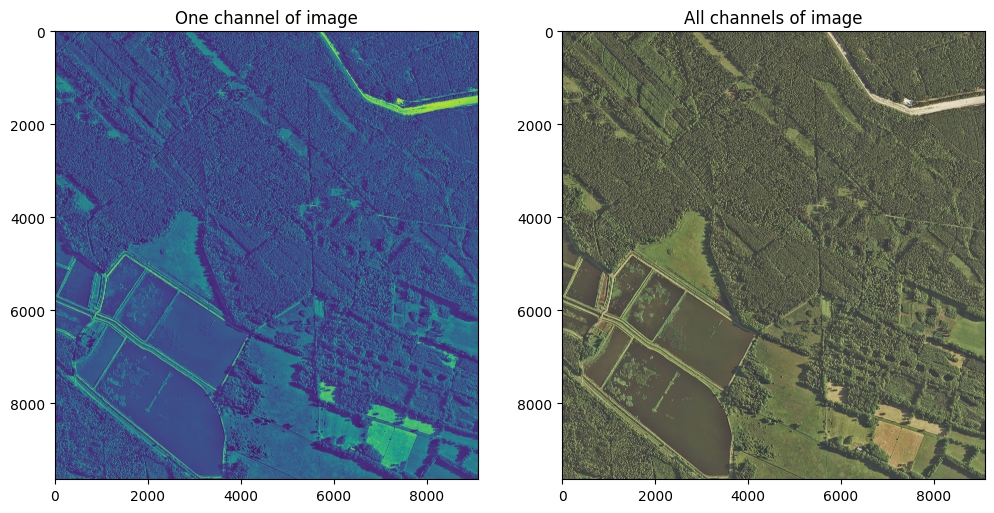


Mask shape: (9636, 9095)

Classes are:  [0 1 2 3 4]  and the counts are:  [18008335    46512 59476087  9553859   554627]



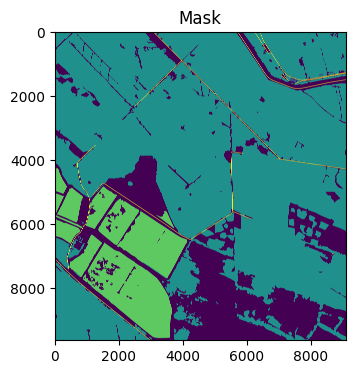

In [23]:
# Visualizing the dataset
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Image and Mask filename: M-33-20-D-c-4-2.tif")
print()
sample_image = cv2.imread("data/images/M-33-20-D-c-4-2.tif", 1) # 3 channels / spectral bands
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
print("Image shape:", sample_image.shape)
print()

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(sample_image[:,:,0])
plt.title("One channel of image")
plt.subplot(122)
plt.imshow(sample_image)
plt.title("All channels of image")
plt.show()
print()

sample_mask = cv2.imread("data/masks/M-33-20-D-c-4-2.tif") # 3 channels but all same. Can also read with cv2.imread(path, 0) to get only one channel.
print("Mask shape:", sample_mask[:,:,0].shape)
print()
label_values, frequency_count = np.unique(sample_mask[:,:,0], return_counts=True) # Visualize only one channel. All chanels are identical.
print("Classes are: ", label_values, " and the counts are: ", frequency_count)
print()

plt.figure(figsize=(6, 4))
plt.imshow(sample_mask[:,:,0])
plt.title("Mask")
plt.show()
print()

# Model Training

In [24]:
import os
import cv2
from patchify import patchify
from pathlib import Path

# --- Configuration ---
base_path = Path("data")
tile_dimension = 512

image_folder = base_path / "images"
mask_folder = base_path / "masks"

processed_image_dir = base_path / f"patches_{tile_dimension}" / "images"
processed_mask_dir  = base_path / f"patches_{tile_dimension}" / "masks"
processed_image_dir.mkdir(parents=True, exist_ok=True)
processed_mask_dir.mkdir(parents=True, exist_ok=True)

def patches_exist_for_file(output_dir, base_name, tile_size):
    """
    Check if patches already exist for this file.
    We assume at least one patch file with pattern *_patch_0_0.tif must exist.
    """
    expected_prefix = base_name.replace(".tif", "_patch_")
    matches = list(output_dir.glob(f"{expected_prefix}*.tif"))
    return len(matches) > 0

def create_patches(source_directory, output_directory, tile_size):
    source_directory = Path(source_directory)
    output_directory = Path(output_directory)
    all_files = [f for f in source_directory.iterdir() if f.suffix.lower() == ".tif"]

    if not all_files:
        print(f"No .tif files found in {source_directory}")
        return

    for file_path in all_files:
        file_name = file_path.name
        # Skip if already processed
        if patches_exist_for_file(output_directory, file_name, tile_size):
            print(f"Skipping {file_name} (patches already exist).")
            continue

        try:
            image_data = cv2.imread(str(file_path), cv2.IMREAD_UNCHANGED)
            if image_data is None:
                print(f"Warning: could not read {file_name}, skipping.")
                continue

            adjusted_height = (image_data.shape[0] // tile_size) * tile_size
            adjusted_width  = (image_data.shape[1] // tile_size) * tile_size
            image_data = image_data[:adjusted_height, :adjusted_width]

            print(f"Patchifying {file_name}...")
            image_tiles = patchify(image_data, (tile_size, tile_size, image_data.shape[2]), step=tile_size)
            print(f"Patches shape for {file_name}: {image_tiles.shape}")

            for row_idx in range(image_tiles.shape[0]):
                for col_idx in range(image_tiles.shape[1]):
                    tile = image_tiles[row_idx, col_idx, 0, :, :]
                    out_name = file_name.replace(".tif", f"_patch_{row_idx}_{col_idx}.tif")
                    cv2.imwrite(str(output_directory / out_name), tile)

        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# --- Run ---
print("\nDividing IMAGES into patches...")
create_patches(image_folder, processed_image_dir, tile_dimension)
print("Image patching completed successfully.")

print("\nDividing MASKS into patches...")
create_patches(mask_folder, processed_mask_dir, tile_dimension)
print("Mask patching completed successfully.")



Dividing IMAGES into patches...
Skipping M-33-20-D-c-4-2.tif (patches already exist).
Skipping M-33-20-D-d-3-3.tif (patches already exist).
Skipping M-33-32-B-b-4-4.tif (patches already exist).
Skipping M-33-48-A-c-4-4.tif (patches already exist).
Skipping M-33-7-A-d-2-3.tif (patches already exist).
Skipping M-33-7-A-d-3-2.tif (patches already exist).
Skipping M-34-32-B-a-4-3.tif (patches already exist).
Skipping M-34-32-B-b-1-3.tif (patches already exist).
Skipping M-34-5-D-d-4-2.tif (patches already exist).
Skipping M-34-51-C-b-2-1.tif (patches already exist).
Skipping M-34-55-B-b-4-1.tif (patches already exist).
Skipping M-34-56-A-b-1-4.tif (patches already exist).
Skipping M-34-6-A-d-2-2.tif (patches already exist).
Skipping M-34-65-D-a-4-4.tif (patches already exist).
Skipping M-34-65-D-c-4-2.tif (patches already exist).
Skipping M-34-65-D-d-4-1.tif (patches already exist).
Skipping M-34-68-B-a-1-3.tif (patches already exist).
Skipping M-34-77-B-c-2-3.tif (patches already exist).

In [25]:
print(len(os.listdir(processed_image_dir)))
print(len(os.listdir(processed_mask_dir)))

7233
7054


In [26]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from pathlib import Path

def filter_background_patches(image_patch_dir, mask_patch_dir, background_threshold=0.95):
    """
    Remove patches where the background class occupies more than a given threshold (default 95%).
    Skips re-running if a done marker is found.
    """

    image_patch_dir = Path(image_patch_dir)
    mask_patch_dir = Path(mask_patch_dir)
    done_marker = mask_patch_dir / "background_filter_done.txt"

    # --- Skip if already done ---
    if done_marker.exists():
        print(" Background filtering already completed previously. Skipping...")
        return

    mask_files = [f for f in mask_patch_dir.iterdir() if f.suffix.lower() in [".tif", ".png", ".jpg", ".jpeg"]]
    if not mask_files:
        print(f"No mask files found in {mask_patch_dir}")
        return

    print(f"Filtering background patches in {len(mask_files)} mask files...")

    deleted_count = 0
    total_count = 0

    for mask_path in tqdm(mask_files, desc="Filtering"):
        total_count += 1
        image_path = image_patch_dir / mask_path.name

        # Skip if corresponding image missing
        if not image_path.exists():
            continue

        # Read mask safely
        mask_data = cv2.imread(str(mask_path), cv2.IMREAD_UNCHANGED)
        if mask_data is None:
            continue

        # Convert RGB mask to grayscale if needed
        if mask_data.ndim == 3:
            mask_data = cv2.cvtColor(mask_data, cv2.COLOR_BGR2GRAY)

        # Compute background ratio (lowest pixel value = background)
        unique_vals, counts = np.unique(mask_data, return_counts=True)
        background_ratio = counts[np.argmin(unique_vals)] / counts.sum()

        # Delete if background exceeds threshold
        if background_ratio > background_threshold:
            try:
                os.remove(image_path)
                os.remove(mask_path)
                deleted_count += 1
            except Exception as e:
                print(f"Error deleting {mask_path.name}: {e}")

    kept_count = total_count - deleted_count
    print("\nSummary:")
    print(f"  Total patches checked: {total_count}")
    print(f"  Deleted (mostly background): {deleted_count}")
    print(f"  Kept: {kept_count}")

    # Write marker file
    with open(done_marker, "w") as f:
        f.write(f"Filtering complete. {deleted_count} deleted, {kept_count} kept.\n")

    print(f"\n Background filtering completed and logged at {done_marker}")

# --- Run ---
filter_background_patches(processed_image_dir, processed_mask_dir)


 Background filtering already completed previously. Skipping...


In [27]:
print(len(os.listdir(processed_image_dir)))
print(len(os.listdir(processed_mask_dir)))

7233
7054


In [28]:
!pip install split-folders


  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [29]:
import splitfolders  # or import split_folders

# Use combined patches root for split
source_directory = str(combined_root)
print('Splitting from:', source_directory)
destination_directory = os.path.join(base_path, "train_val_test")
print(destination_directory)

os.makedirs(destination_directory, exist_ok=True)

# Split with a ratio.
# To split into training, validation, and testing set, set a tuple to `ratio`, i.e, `(.8, .1, .1)`.
splitfolders.ratio(source_directory, output=destination_directory, seed=42, ratio=(.8, .2), group_prefix=None, move=False) # splitting in training and validation only

training_directory = os.path.join(destination_directory, "train")
validation_directory = os.path.join(destination_directory, "val")
# test_dir = os.path.join(destination_directory, "test")

Splitting from: /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/combined
data/train_val_test


Copying files: 100 files [02:20,  1.40s/ files]


In [30]:
train_image_path = os.path.join(training_directory, "images")
train_mask_path = os.path.join(training_directory, "masks")

val_image_path = os.path.join(validation_directory, "images")
val_mask_path = os.path.join(validation_directory, "masks")

In [31]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [32]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset
from typing import List, Optional, Callable, Tuple
import logging
from pathlib import Path
import random

class ManualAugmentation:
    """Manual augmentation implementation to avoid albumentations dependency"""

    @staticmethod
    def horizontal_flip(image: np.ndarray, mask: np.ndarray, p: float = 0.5) -> Tuple[np.ndarray, np.ndarray]:
        if random.random() < p:
            image = cv2.flip(image, 1)
            mask = cv2.flip(mask, 1)
        return image, mask

    @staticmethod
    def vertical_flip(image: np.ndarray, mask: np.ndarray, p: float = 0.5) -> Tuple[np.ndarray, np.ndarray]:
        if random.random() < p:
            image = cv2.flip(image, 0)
            mask = cv2.flip(mask, 0)
        return image, mask

    @staticmethod
    def random_rotate(image: np.ndarray, mask: np.ndarray, p: float = 0.3,
                     angle_range: Tuple[float, float] = (-45, 45)) -> Tuple[np.ndarray, np.ndarray]:
        if random.random() < p:
            angle = random.uniform(angle_range[0], angle_range[1])
            h, w = image.shape[:2]
            center = (w // 2, h // 2)

            rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
            image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
            mask = cv2.warpAffine(mask, rotation_matrix, (w, h), flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_REFLECT)

        return image, mask

    @staticmethod
    def random_brightness_contrast(image: np.ndarray, p: float = 0.3,
                                  brightness_range: Tuple[float, float] = (0.8, 1.2),
                                  contrast_range: Tuple[float, float] = (0.8, 1.2)) -> np.ndarray:
        if random.random() < p:
            brightness_factor = random.uniform(brightness_range[0], brightness_range[1])
            contrast_factor = random.uniform(contrast_range[0], contrast_range[1])

            image = image * brightness_factor
            image = (image - image.mean()) * contrast_factor + image.mean()
            image = np.clip(image, 0, 1)

        return image

def create_augmentation_pipeline():
    """Create manual augmentation pipeline"""
    def augment(image: np.ndarray, mask: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        image, mask = ManualAugmentation.horizontal_flip(image, mask, p=0.5)
        image, mask = ManualAugmentation.vertical_flip(image, mask, p=0.5)
        image, mask = ManualAugmentation.random_rotate(image, mask, p=0.3)
        # Brightness/contrast assumes image is 0..1
        image = ManualAugmentation.random_brightness_contrast(image, p=0.3)
        return image, mask
    return augment

def create_preprocessing_pipeline(normalization_function: Optional[Callable] = None):
    """Create preprocessing pipeline that normalizes image and returns tensors.
    - image: (H, W, C) float32 CHW
    - mask:  (H, W) long indices (no channel expansion)
    """
    def preprocess(image: np.ndarray, mask: np.ndarray) -> Tuple[torch.Tensor, torch.Tensor]:
        # Apply normalization if provided (expects image in 0..1 or raw, depending on fn)
        if normalization_function is not None:
            image = normalization_function(image)

        # Convert to tensor format (H, W, C) -> (C, H, W)
        if image.ndim == 3:
            image_tensor = torch.from_numpy(image.transpose(2, 0, 1)).float()
        else:
            image_tensor = torch.from_numpy(np.expand_dims(image, axis=0)).float()

        # Ensure mask is single-channel of class indices
        if mask.ndim == 3:
            mask = mask[:, :, 0]
        mask_tensor = torch.from_numpy(mask.astype(np.int64))
        return image_tensor, mask_tensor
    return preprocess

def imagenet_normalization(image: np.ndarray) -> np.ndarray:
    """ImageNet normalization"""
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (image - mean) / std

def simple_normalization(image: np.ndarray) -> np.ndarray:
    """Simple 0-1 normalization (already done in loading)"""
    return image

class LandCoverDataset(Dataset):
    """
    LandCover.ai-like dataset with robust mask handling and manual augmentations.

    Returns:
      - image: Float tensor [C, H, W]
      - mask:  Long tensor [H, W] with class indices 0..num_classes-1
    """

    LABEL_NAMES = ['background', 'building', 'woodland', 'water', 'road']
    VALID_EXTENSIONS = {'.tif', '.tiff', '.png', '.jpg', '.jpeg'}

    def __init__(
        self,
        images_dir: str,
        masks_dir: str,
        classes: Optional[List[str]] = None,
        augmentation: Optional[Callable] = None,
        preprocessing: Optional[Callable] = None,
        cache_data: bool = False,
        image_size: Optional[Tuple[int, int]] = None,
    ):
        self.images_dir = Path(images_dir)
        self.masks_dir = Path(masks_dir)
        self.image_size = image_size

        # Validate directories exist
        if not self.images_dir.exists():
            raise FileNotFoundError(f"Images directory not found: {images_dir}")
        if not self.masks_dir.exists():
            raise FileNotFoundError(f"Masks directory not found: {masks_dir}")

        # Get valid image files
        self.image_files = self._get_valid_files(self.images_dir)
        self.mask_files = self._get_valid_files(self.masks_dir)

        if not self.image_files:
            raise ValueError(f"No valid image files found in {images_dir}")
        if not self.mask_files:
            raise ValueError(f"No valid mask files found in {masks_dir}")

        # Match image and mask files
        self.samples = self._match_image_mask_pairs()
        if not self.samples:
            raise ValueError("No matching image-mask pairs found")
        print(f"✅ Found {len(self.samples)} image-mask pairs")

        # Class configuration
        if classes is None:
            classes = self.LABEL_NAMES
        self.classes = [cls.lower() for cls in classes]

        # Validate classes
        invalid_classes = set(self.classes) - set(self.LABEL_NAMES)
        if invalid_classes:
            raise ValueError(f"Invalid classes: {invalid_classes}. Valid classes: {self.LABEL_NAMES}")

        # Build a mapping from original label indices -> compressed indices [0..num_classes-1]
        # Any label not in selected classes will be mapped to background (index of 'background')
        if 'background' not in self.classes:
            # Ensure background exists to have a safe fallback
            self.classes = ['background'] + [c for c in self.classes if c != 'background']
        self.class_to_compact = {name: idx for idx, name in enumerate(self.classes)}
        bg_idx = self.class_to_compact['background']
        label_name_by_idx = {idx: name for idx, name in enumerate(self.LABEL_NAMES)}
        self.index_map = np.zeros(256, dtype=np.uint8)  # covers typical mask values safely
        for orig_idx, name in label_name_by_idx.items():
            self.index_map[orig_idx] = self.class_to_compact.get(name, bg_idx)

        self.num_classes = len(self.classes)

        # Transforms
        self.augmentation = augmentation
        self.preprocessing = preprocessing

        # Caching
        self.cache_data = cache_data
        self.image_cache = {}
        self.mask_cache = {}

    def _get_valid_files(self, directory: Path) -> List[Path]:
        """Get list of valid image files from directory"""
        valid_files = []
        for ext in self.VALID_EXTENSIONS:
            valid_files.extend(directory.glob(f"*{ext}"))
            valid_files.extend(directory.glob(f"*{ext.upper()}"))
        return sorted(valid_files)

    def _match_image_mask_pairs(self) -> List[Tuple[Path, Path]]:
        """Match image and mask files by filename (without extension)"""
        image_dict = {f.stem: f for f in self.image_files}
        mask_dict = {f.stem: f for f in self.mask_files}

        common_stems = set(image_dict.keys()) & set(mask_dict.keys())

        if not common_stems:
            # Try to match by filename patterns
            print("⚠️ No exact filename matches found. Attempting pattern matching...")
            return self._match_by_patterns()

        pairs = [(image_dict[stem], mask_dict[stem]) for stem in sorted(common_stems)]
        print(f"✅ Matched {len(pairs)} pairs by exact filenames")
        return pairs

    def _match_by_patterns(self) -> List[Tuple[Path, Path]]:
        """Alternative matching for differently named files"""
        pairs = []
        matched_count = 0

        for img_file in self.image_files:
            # Try common mask naming patterns
            possible_mask_names = [
                img_file.stem + '.png',
                img_file.stem + '.tif',
                img_file.stem + '_mask.png',
                img_file.stem.replace('_sat', '_mask'),
                img_file.stem.replace('image', 'mask'),
            ]

            for mask_name in possible_mask_names:
                mask_path = self.masks_dir / mask_name
                if mask_path.exists():
                    pairs.append((img_file, mask_path))
                    matched_count += 1
                    break
            else:
                print(f"⚠️ No mask found for image: {img_file.name}")

        print(f"✅ Matched {matched_count} pairs by pattern matching")
        return pairs

    def _load_image(self, image_path: Path) -> np.ndarray:
        """Load and validate image as float32 in [0,1] RGB"""
        if self.cache_data and image_path in self.image_cache:
            return self.image_cache[image_path].copy()

        image = cv2.imread(str(image_path))
        if image is None:
            raise ValueError(f"Could not read image: {image_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype(np.float32) / 255.0

        # Resize if specified
        if self.image_size:
            image = cv2.resize(image, (self.image_size[1], self.image_size[0]), interpolation=cv2.INTER_LINEAR)

        if self.cache_data:
            self.image_cache[image_path] = image.copy()

        return image

    def _load_mask(self, mask_path: Path) -> np.ndarray:
        """Load segmentation mask as single-channel of class indices mapped to selected classes"""
        if self.cache_data and mask_path in self.mask_cache:
            return self.mask_cache[mask_path].copy()

        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
        if mask is None:
            raise ValueError(f"Could not read mask: {mask_path}")

        # Resize if specified
        if self.image_size:
            mask = cv2.resize(mask, (self.image_size[1], self.image_size[0]), interpolation=cv2.INTER_NEAREST)

        # Map original labels -> compact indices; unknowns -> background
        mask_mapped = self.index_map[mask]

        if self.cache_data:
            self.mask_cache[mask_path] = mask_mapped.copy()

        return mask_mapped

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """Get image [C,H,W] float tensor and mask [H,W] long tensor"""
        image_path, mask_path = self.samples[index]

        # Load data
        image = self._load_image(image_path)
        mask = self._load_mask(mask_path)

        # Apply augmentations in numpy domain
        if self.augmentation:
            image, mask = self.augmentation(image, mask)

        # Apply preprocessing (normalize + to tensor)
        if self.preprocessing:
            image_t, mask_t = self.preprocessing(image, mask)
        else:
            image_t = torch.from_numpy(image.transpose(2, 0, 1)).float()
            mask_t = torch.from_numpy(mask.astype(np.int64))

        return image_t, mask_t

    def __len__(self) -> int:
        return len(self.samples)

    def get_class_distribution(self) -> dict:
        """Calculate class distribution across the dataset"""
        class_counts = {cls: 0 for cls in self.classes}
        total_pixels = 0

        print("📊 Calculating class distribution...")
        for i, (_, mask_path) in enumerate(self.samples):
            if i % 100 == 0:
                print(f"  Processed {i}/{len(self.samples)} samples...")

            mask = self._load_mask(mask_path)
            for j, cls in enumerate(self.classes):
                class_counts[cls] += int(np.sum(mask == j))
            total_pixels += mask.shape[0] * mask.shape[1]

        class_distribution = {
            cls: (count / total_pixels) for cls, count in class_counts.items()
        }

        print("✅ Class distribution calculated")
        return class_distribution

    def visualize_sample(self, index: int, save_path: Optional[str] = None):
        """Visualize a sample (for debugging)"""
        import matplotlib.pyplot as plt

        image_t, mask_t = self[index]
        image = image_t.permute(1, 2, 0).numpy()
        mask = mask_t.numpy()

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(np.clip(image, 0, 1))
        axes[0].set_title('Input Image')
        axes[0].axis('off')

        im = axes[1].imshow(mask, cmap='viridis')
        axes[1].set_title('Mask indices')
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()

    def clear_cache(self):
        """Clear the data cache"""
        self.image_cache.clear()
        self.mask_cache.clear()
        print("✅ Cache cleared")

# Example usage
if __name__ == "__main__":
    # Create dataset with manual augmentations
    dataset = LandCoverDataset(
        images_dir='data/images',
        masks_dir='data/masks',
        classes=['background', 'building', 'woodland', 'water'],
        augmentation=create_augmentation_pipeline(),
        preprocessing=create_preprocessing_pipeline(simple_normalization),
        cache_data=False,
        image_size=(256, 256)  # Optional resizing
    )

    print(f"Dataset size: {len(dataset)}")
    print(f"Classes: {dataset.classes}")

    # Test one sample (only if files exist)
    try:
        image, mask = dataset[0]
        print(f"Image shape: {image.shape}")
        print(f"Mask shape: {mask.shape}, dtype={mask.dtype}, min={mask.min().item()}, max={mask.max().item()}")
    except Exception as e:
        print(f"Sample test skipped: {e}")

✅ Matched 41 pairs by exact filenames
✅ Found 41 image-mask pairs
Dataset size: 41
Classes: ['background', 'building', 'woodland', 'water']
Image shape: torch.Size([3, 256, 256])
Mask shape: torch.Size([256, 256]), dtype=torch.int64, min=0, max=3


Checking directories...
Image path: /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/images_dg
Mask path: /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks_dg
Dataset directories verified successfully.

Testing LandCoverDataset with visualization...
✅ Matched 12848 pairs by exact filenames
✅ Found 12848 image-mask pairs
Sample image shape: torch.Size([3, 512, 512])
Sample mask shape: torch.Size([512, 512])


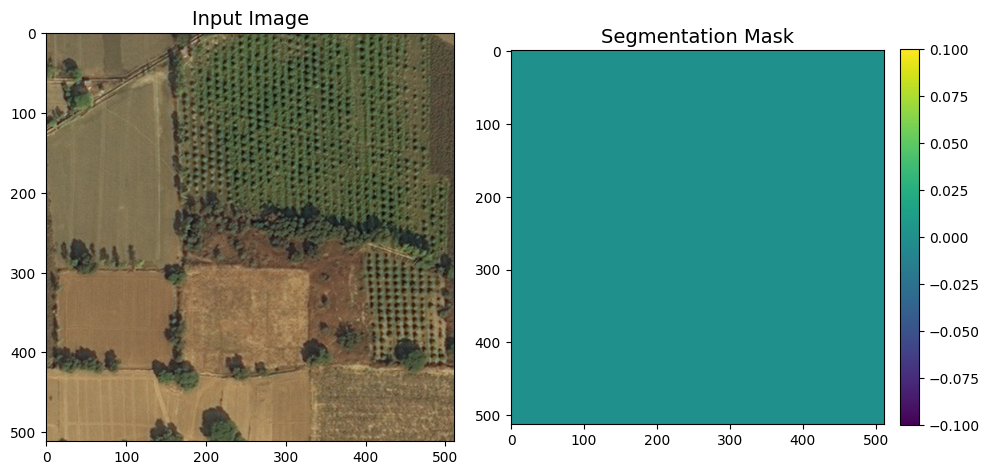

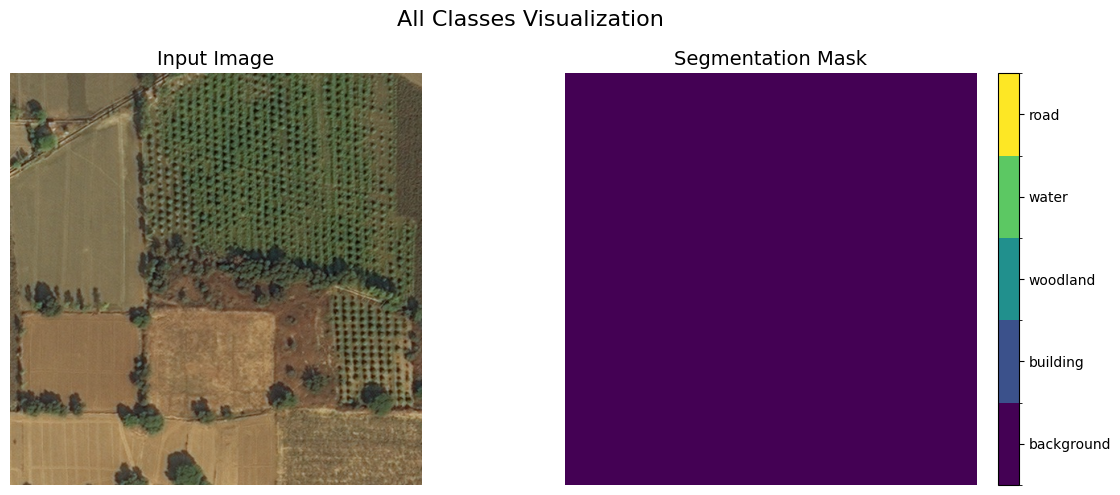


Class distribution in this sample:
background: 262144 pixels (100.00%)
building: 0 pixels (0.00%)
woodland: 0 pixels (0.00%)
water: 0 pixels (0.00%)
road: 0 pixels (0.00%)


In [35]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path

# ----------------------------
# CONFIGURATION
# ----------------------------
base_path = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data")

# Update these based on where your patchified data is stored
train_image_path = base_path / "patches_512" / "images_dg"
train_mask_path = base_path / "patches_512" / "masks_dg"

# ----------------------------
# CHECK DIRECTORIES
# ----------------------------
print("Checking directories...")
print("Image path:", train_image_path)
print("Mask path:", train_mask_path)

if not train_image_path.exists() or not any(train_image_path.iterdir()):
    raise FileNotFoundError(f"No valid image files found in {train_image_path}")

if not train_mask_path.exists() or not any(train_mask_path.iterdir()):
    raise FileNotFoundError(f"No valid mask files found in {train_mask_path}")

print("Dataset directories verified successfully.")

# ----------------------------
# VISUALIZATION FUNCTIONS
# ----------------------------
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 14

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(10, 5))

        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()
        ax[0].imshow(image)
        ax[0].set_title('Input Image', fontsize=fontsize)

        if isinstance(mask, torch.Tensor):
            mask = mask.squeeze().numpy()
        if len(mask.shape) == 3 and mask.shape[-1] > 1:
            mask = np.argmax(mask, axis=-1)

        im = ax[1].imshow(mask, cmap='viridis')
        ax[1].set_title('Segmentation Mask', fontsize=fontsize)
        plt.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)

    else:
        f, ax = plt.subplots(2, 2, figsize=(10, 10))

        if isinstance(original_image, torch.Tensor):
            original_image = original_image.permute(1, 2, 0).numpy()
        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original Image', fontsize=fontsize)

        if isinstance(original_mask, torch.Tensor):
            original_mask = original_mask.squeeze().numpy()
        if len(original_mask.shape) == 3 and original_mask.shape[-1] > 1:
            original_mask = np.argmax(original_mask, axis=-1)
        im1 = ax[0, 1].imshow(original_mask, cmap='viridis')
        ax[0, 1].set_title('Original Mask', fontsize=fontsize)
        plt.colorbar(im1, ax=ax[0, 1], fraction=0.046, pad=0.04)

        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()
        ax[1, 0].imshow(image)
        ax[1, 0].set_title('Processed Image', fontsize=fontsize)

        if isinstance(mask, torch.Tensor):
            mask = mask.squeeze().numpy()
        if len(mask.shape) == 3 and mask.shape[-1] > 1:
            mask = np.argmax(mask, axis=-1)
        im2 = ax[1, 1].imshow(mask, cmap='viridis')
        ax[1, 1].set_title('Processed Mask', fontsize=fontsize)
        plt.colorbar(im2, ax=ax[1, 1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()


def visualize_with_classes(image, mask, class_names, title="Segmentation Results"):
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).numpy()

    if isinstance(mask, torch.Tensor):
        if mask.dim() == 3:   # only permute if it's 3D
            mask = mask.permute(1, 2, 0).numpy()
        else:
            mask = mask.numpy()

    if len(mask.shape) == 3 and mask.shape[-1] > 1:
        mask_single = np.argmax(mask, axis=-1)
    else:
        mask_single = mask.squeeze()

    from matplotlib import colors
    cmap = plt.cm.viridis
    bounds = range(len(class_names) + 1)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(image)
    ax1.set_title('Input Image', fontsize=14)
    ax1.axis('off')

    im = ax2.imshow(mask_single, cmap=cmap, norm=norm)
    ax2.set_title('Segmentation Mask', fontsize=14)
    ax2.axis('off')

    cbar = plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    cbar.set_ticks([i + 0.5 for i in range(len(class_names))])
    cbar.set_ticklabels(class_names)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"\nClass distribution in this sample:")
    for class_idx, class_name in enumerate(class_names):
        pixel_count = np.sum(mask_single == class_idx)
        total_pixels = mask_single.shape[0] * mask_single.shape[1]
        percentage = (pixel_count / total_pixels) * 100
        print(f"{class_name}: {pixel_count} pixels ({percentage:.2f}%)")


# ----------------------------
# DATASET TESTING
# ----------------------------
print("\nTesting LandCoverDataset with visualization...")

# Ensure you have defined LandCoverDataset before running this block
sample_dataset = LandCoverDataset(
    train_image_path,
    train_mask_path,
    classes=['background', 'building', 'woodland', 'water', 'road']
)

sample_image, sample_mask = sample_dataset[4]
print(f"Sample image shape: {sample_image.shape}")
print(f"Sample mask shape: {sample_mask.shape}")

visualize(sample_image, sample_mask)

# Visualize with class information
visualize_with_classes(
    image=sample_image,
    mask=sample_mask,
    class_names=['background', 'building', 'woodland', 'water', 'road'],
    title="All Classes Visualization"
)


In [38]:
# Manual augmentations and preprocessing (safe from albumentations/numpy version issues)
import numpy as np
import cv2
import random
import torch

class ManualAugmentation:
    """Manual augmentation implementation avoiding albumentations version conflicts"""

    @staticmethod
    def horizontal_flip(image, mask, p=0.5):
        """Random horizontal flip"""
        if random.random() < p:
            image = cv2.flip(image, 1)
            mask = cv2.flip(mask, 1)
        return image, mask

    @staticmethod
    def vertical_flip(image, mask, p=0.5):
        """Random vertical flip"""
        if random.random() < p:
            image = cv2.flip(image, 0)
            mask = cv2.flip(mask, 0)
        return image, mask

    @staticmethod
    def random_brightness_contrast(image, p=0.3, alpha_range=(0.9, 1.1), beta_range=(-20, 20)):
        """Apply random brightness/contrast to RGB image"""
        if random.random() < p:
            alpha = random.uniform(*alpha_range)
            beta = random.uniform(*beta_range)
            image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
        return image


def create_augmentation_pipeline():
    """Create manual augmentation pipeline"""
    def augment(image, mask):
        image, mask = ManualAugmentation.horizontal_flip(image, mask, p=0.5)
        image, mask = ManualAugmentation.vertical_flip(image, mask, p=0.5)
        image = ManualAugmentation.random_brightness_contrast(image, p=0.3)
        return image, mask
    return augment


def convert_to_tensor(data_array):
    """Convert numpy array (H, W, C) or (H, W) to torch tensor (C, H, W)"""
    if data_array.ndim == 3:  # RGB
        data_array = data_array.transpose(2, 0, 1)
    else:  # single-channel mask
        data_array = np.expand_dims(data_array, axis=0)
    return torch.from_numpy(data_array.astype(np.float32))


def create_preprocessing_pipeline(normalization_function):
    """Create preprocessing pipeline"""
    def preprocess(image, mask):
        image = normalization_function(image)
        image_tensor = convert_to_tensor(image)
        mask_tensor = convert_to_tensor(mask)
        return image_tensor, mask_tensor
    return preprocess


# Example normalization functions
def imagenet_normalization(image):
    """ImageNet normalization (for pretrained encoders like ResNet, EfficientNet, etc.)"""
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (image / 255.0 - mean) / std


def simple_normalization(image):
    """Simple 0–1 normalization (for models trained from scratch)"""
    return image / 255.0


In [39]:
!ls -R /content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data | head -n 50


/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data:
deepglobe
deepglobe_converted
deepglobe-land-cover-classification-dataset.zip
images
masks
patches_512
split.py
test
test.txt
train
train.txt
train_val_test
val.txt

/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe:
class_dict.csv
metadata.csv
test
train
valid

/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe/test:
100877_sat.jpg
103215_sat.jpg
103742_sat.jpg
110224_sat.jpg
112946_sat.jpg
114542_sat.jpg
115800_sat.jpg
118757_sat.jpg
119896_sat.jpg
120939_sat.jpg
121151_sat.jpg
123976_sat.jpg
125014_sat.jpg
133160_sat.jpg
134874_sat.jpg
14397_sat.jpg
1499_sat.jpg
157550_sat.jpg
159696_sat.jpg
162964_sat.jpg
168870_sat.jpg
169788_sat.jpg
172318_sat.jpg
17557_sat.jpg
181781_sat.jpg
186618_sat.jpg
191568_sat.jpg


In [40]:
import os
import random
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# ----------------------------
# AUGMENTATION + PREPROCESSING
# ----------------------------
def simple_normalization(image):
    """Simple 0–1 normalization"""
    return image / 255.0

def create_augmentation_pipeline():
    """Manual horizontal + vertical flips"""
    def augment(image, mask):
        if random.random() < 0.5:
            image = cv2.flip(image, 1)
            mask = cv2.flip(mask, 1)
        if random.random() < 0.5:
            image = cv2.flip(image, 0)
            mask = cv2.flip(mask, 0)
        return image, mask
    return augment

def convert_to_tensor(data_array):
    """Convert numpy arrays to PyTorch tensors (C, H, W)"""
    if data_array.ndim == 3:
        data_array = data_array.transpose(2, 0, 1)
    else:
        data_array = np.expand_dims(data_array, axis=0)
    return torch.from_numpy(data_array.astype(np.float32))

def create_preprocessing_pipeline(normalization_function):
    """Apply normalization + convert to tensor"""
    def preprocess(image, mask):
        image = normalization_function(image)
        image = convert_to_tensor(image)
        mask = convert_to_tensor(mask)
        return image, mask
    return preprocess


# ----------------------------
# VISUALIZATION FUNCTION
# ----------------------------
def visualize(image, mask, title=None):
    """Display augmented image, mask, and overlay"""
    if torch.is_tensor(image):
        image = image.permute(1, 2, 0).cpu().numpy()
    if torch.is_tensor(mask):
        mask = mask.squeeze().cpu().numpy()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(np.clip(image, 0, 1))
    plt.title('Augmented Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='jet', interpolation='nearest')
    plt.title('Augmented Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    color_mask = cv2.applyColorMap((mask.astype(np.uint8) * 60), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted((image * 255).astype(np.uint8), 0.6, color_mask, 0.4, 0)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title('Overlay')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# ----------------------------
# DATASET CLASS
# ----------------------------
class LandCoverDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, mask_dir, augmentation=None, preprocessing=None, classes=None):
        self.image_dir = Path(image_dir)
        self.mask_dir = Path(mask_dir)

        self.image_paths = sorted(list(self.image_dir.glob("*.tif")))
        self.mask_paths = sorted(list(self.mask_dir.glob("*.tif")))

        # Keep only pairs that exist in both
        image_stems = {p.stem for p in self.image_paths}
        mask_stems = {p.stem for p in self.mask_paths}
        common_stems = image_stems & mask_stems
        self.image_paths = [p for p in self.image_paths if p.stem in common_stems]
        self.mask_paths = [p for p in self.mask_paths if p.stem in common_stems]

        self.augmentation = augmentation
        self.preprocessing = preprocessing
        self.classes = classes or ['background', 'building', 'woodland', 'water', 'road']

        if len(self.image_paths) == 0:
            raise RuntimeError(f"No valid image/mask pairs found in {image_dir} and {mask_dir}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        if idx >= len(self.image_paths):
            raise IndexError(f"Index {idx} out of range for dataset of length {len(self.image_paths)}")

        image = cv2.imread(str(self.image_paths[idx]))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(str(self.mask_paths[idx]), cv2.IMREAD_GRAYSCALE)

        if image is None or mask is None:
            raise RuntimeError(f"Failed to read image/mask pair at index {idx}")

        if self.augmentation:
            image, mask = self.augmentation(image, mask)

        if self.preprocessing:
            image, mask = self.preprocessing(image, mask)

        image = torch.tensor(image, dtype=torch.float32)
        mask = torch.tensor(mask, dtype=torch.long)

        return image, mask


# ----------------------------
# PATH CONFIGURATION (AUTO-DETECT)
# ----------------------------
base_path = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512")

possible_datasets = [
    ("images_dg", "masks_dg"),  # DeepGlobe
    ("images", "masks"),        # LandCover.ai
    ("combined/images", "combined/masks")  # Combined
]

train_image_path = None
train_mask_path = None

for img_folder, msk_folder in possible_datasets:
    img_path = base_path / img_folder
    msk_path = base_path / msk_folder
    if img_path.exists() and any(img_path.iterdir()) and msk_path.exists() and any(msk_path.iterdir()):
        train_image_path = img_path
        train_mask_path = msk_path
        print(f"✅ Using dataset: {img_folder}")
        break

if train_image_path is None:
    raise FileNotFoundError("No valid dataset found in patches_512 (expected images_dg/masks_dg or images/masks).")

print(f"Image path: {train_image_path}")
print(f"Mask path:  {train_mask_path}")


# ----------------------------
# DATASET CREATION
# ----------------------------
augmented_dataset = LandCoverDataset(
    image_dir=train_image_path,
    mask_dir=train_mask_path,
    augmentation=create_augmentation_pipeline(),
    preprocessing=create_preprocessing_pipeline(simple_normalization)
)

print(f"Total patches found: {len(augmented_dataset)}")

# ----------------------------
# VISUALIZATION
# ----------------------------
sample_index = random.randint(0, len(augmented_dataset) - 1)
print(f"Visualizing sample index: {sample_index}")

for i in range(3):
    augmented_image, augmented_mask = augmented_dataset[sample_index]
    visualize(augmented_image, augmented_mask, title=f"Augmentation {i+1}")


Output hidden; open in https://colab.research.google.com to view.

In [41]:
!pip install segmentation-models-pytorch timm torchvision --quiet


In [42]:
import os
import random
import numpy as np
import torch
import segmentation_models_pytorch as smp

print("NumPy version:", __import__('numpy').__version__)
print("Torch version:", torch.__version__)
print("SMP version:", smp.__version__)

# --- REPRO/ACCEL SETTINGS ---
SEED = int(os.environ.get("GAIA_SEED", 42))
DETERMINISTIC = False  # set True for exact reproducibility (slower)

def set_seed(seed=42, deterministic=False):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    if torch.backends.cudnn.is_available():
        torch.backends.cudnn.deterministic = deterministic
        torch.backends.cudnn.benchmark = not deterministic

set_seed(SEED, DETERMINISTIC)
try:
    torch.set_float32_matmul_precision('high')  # PyTorch 2.x for speed
except Exception:
    pass

# --- MODEL SETUP ---
MINI_BATCH_SIZE = 16
BACKBONE_MODEL = 'efficientnet-b0'
PRETRAINED_WEIGHTS = 'imagenet'
TARGET_LABELS = ['background', 'building', 'woodland', 'water']

# IMPORTANT: use activation=None during training so the model returns logits
MODEL_ACTIVATION = None  # set to 'softmax2d' only for inference convenience

# Robust device selection
COMPUTE_DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
USE_AMP = (COMPUTE_DEVICE == 'cuda')  # enable mixed precision on GPU
print(f"Using device: {COMPUTE_DEVICE} | AMP: {USE_AMP}")

# Build model and move to device
segmentation_model = smp.Unet(
    encoder_name=BACKBONE_MODEL,
    encoder_weights=PRETRAINED_WEIGHTS,
    classes=len(TARGET_LABELS),
    activation=MODEL_ACTIVATION,
).to(COMPUTE_DEVICE)

# Get preprocessing normalization function
normalization_function = smp.encoders.get_preprocessing_fn(BACKBONE_MODEL, PRETRAINED_WEIGHTS)

TOTAL_EPOCHS = int(os.environ.get("GAIA_EPOCHS", 100))  # tweak via env var
print("Model and normalization function loaded successfully.")

NumPy version: 1.26.4
Torch version: 2.9.0+cu128
SMP version: 0.5.0
Using device: cuda | AMP: True


/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  _C._set_float32_matmul_precision(precision)
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to 

config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

Model and normalization function loaded successfully.


In [46]:
# ----------------------------
# CONFIGURATION
# ----------------------------
MINI_BATCH_SIZE = 16
TARGET_LABELS = ['background', 'building', 'woodland', 'water']
normalization_function = imagenet_normalization  # or simple_normalization

# Use unified patches root
PATCHES_ROOT = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512")
base_path = PATCHES_ROOT

# Candidate datasets
possible_sets = [
    ("images_dg", "masks_dg"),
    ("images", "masks"),
    ("combined/images", "combined/masks")
]

train_image_path = train_mask_path = None
for img_folder, mask_folder in possible_sets:
    img_path, mask_path = base_path / img_folder, base_path / mask_folder
    if img_path.exists() and any(img_path.iterdir()) and mask_path.exists() and any(mask_path.iterdir()):
        train_image_path, train_mask_path = img_path, mask_path
        print(f"Using dataset: {img_folder}")
        break

if train_image_path is None:
    raise FileNotFoundError(" No valid patch dataset found in patches_512 folder.")

# ----------------------------
# DATASETS
# ----------------------------
training_dataset = LandCoverDataset(
    train_image_path,
    train_mask_path,
    augmentation=create_augmentation_pipeline(),
    preprocessing=create_preprocessing_pipeline(normalization_function),
    classes=TARGET_LABELS,
)

val_image_path = base_path / "val" / "images"
val_mask_path  = base_path / "val" / "masks"

if val_image_path.exists() and any(val_image_path.iterdir()):
    print("Using explicit validation folder.")
    validation_dataset = LandCoverDataset(
        val_image_path, val_mask_path,
        preprocessing=create_preprocessing_pipeline(normalization_function),
        classes=TARGET_LABELS,
    )
else:
    print("No explicit validation folder found. Performing 80/20 random split.")
    val_size = int(0.2 * len(training_dataset))
    train_size = len(training_dataset) - val_size
    generator = torch.Generator().manual_seed(42)
    training_dataset, validation_dataset = random_split(training_dataset, [train_size, val_size], generator=generator)

# ----------------------------
# DATALOADERS
# ----------------------------
num_workers = min(4, max(0, (os.cpu_count() or 2) - 1))
pin_memory = (COMPUTE_DEVICE == 'cuda')
persistent_workers = pin_memory and num_workers > 1

common_loader_kwargs = dict(
    num_workers=num_workers,
    pin_memory=pin_memory,
    persistent_workers=persistent_workers,
    prefetch_factor=2
)

training_data_loader = DataLoader(
    training_dataset, batch_size=MINI_BATCH_SIZE, shuffle=True, drop_last=True, **common_loader_kwargs
)
validation_data_loader = DataLoader(
    validation_dataset, batch_size=1, shuffle=False, drop_last=False, **common_loader_kwargs
)

print(f"Training samples: {len(training_dataset)}")
print(f"Validation samples: {len(validation_dataset)}")
print(f"DataLoader workers: {num_workers}, pin_memory: {pin_memory}, persistent_workers: {persistent_workers}")


Using dataset: images_dg
No explicit validation folder found. Performing 80/20 random split.
Training samples: 10279
Validation samples: 2569
DataLoader workers: 4, pin_memory: True, persistent_workers: True


In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# ----------------------------
# Custom Dice Loss (Multiclass)
# ----------------------------
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6, ignore_index=-100):
        super().__init__()
        self.smooth = smooth
        self.ignore_index = ignore_index

    def forward(self, preds, targets):
        """
        preds: [B, C, H, W] - model output (raw logits)
        targets: [B, H, W]  - ground truth class indices
        """
        num_classes = preds.shape[1]

        # Convert logits → probabilities
        preds = torch.softmax(preds, dim=1)

        # Handle ignore_index if present
        if self.ignore_index >= 0:
            valid_mask = targets != self.ignore_index
            targets = targets.clone()
            targets[~valid_mask] = 0  # Set ignored pixels to background temporarily
        else:
            valid_mask = torch.ones_like(targets, dtype=torch.bool)

        # One-hot encode targets to shape [B, C, H, W]
        targets_onehot = F.one_hot(targets, num_classes).permute(0, 3, 1, 2).float()

        # Apply valid mask if ignore_index is used
        valid_mask = valid_mask.unsqueeze(1).expand_as(preds)
        preds = preds * valid_mask.float()
        targets_onehot = targets_onehot * valid_mask.float()

        intersection = (preds * targets_onehot).sum(dim=(0, 2, 3))
        union = preds.sum(dim=(0, 2, 3)) + targets_onehot.sum(dim=(0, 2, 3))
        dice = (2.0 * intersection + self.smooth) / (union + self.smooth)

        # 1 - mean(Dice) for loss
        return 1 - dice.mean()

# ----------------------------
# Improved IoU Metric (Mean Jaccard Index)
# ----------------------------
class IoUMetric:
    def __init__(self, num_classes, ignore_index=-100, reduction='mean'):
        self.num_classes = num_classes
        self.ignore_index = ignore_index
        self.reduction = reduction

    def __call__(self, preds, targets):
        """
        preds: [B, C, H, W] - model output (logits)
        targets: [B, H, W]  - class indices
        """
        preds = torch.softmax(preds, dim=1)
        preds = torch.argmax(preds, dim=1)  # [B, H, W]

        ious = []
        for class_idx in range(self.num_classes):
            pred_mask = (preds == class_idx)
            target_mask = (targets == class_idx)

            # Handle ignore_index
            if self.ignore_index >= 0:
                valid_mask = targets != self.ignore_index
                pred_mask = pred_mask & valid_mask
                target_mask = target_mask & valid_mask

            intersection = (pred_mask & target_mask).float().sum()
            union = (pred_mask | target_mask).float().sum()

            if union > 0:
                iou = intersection / (union + 1e-6)
                ious.append(iou)
            else:
                ious.append(torch.tensor(0.0, device=preds.device))

        ious = torch.stack(ious)

        if self.reduction == 'mean':
            return ious.mean()
        elif self.reduction == 'none':
            return ious
        else:
            return ious

# ----------------------------
# Focal Loss for class imbalance
# ----------------------------
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, preds, targets):
        ce_loss = F.cross_entropy(preds, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# ----------------------------
# Combined Loss (Dice + CrossEntropy)
# ----------------------------
class CombinedLoss(nn.Module):
    def __init__(self, dice_weight=0.5, ce_weight=0.5, focal_weight=0.0, ignore_index=-100):
        super().__init__()
        self.dice_weight = dice_weight
        self.ce_weight = ce_weight
        self.focal_weight = focal_weight

        self.dice_loss = DiceLoss(ignore_index=ignore_index)
        self.ce_loss = nn.CrossEntropyLoss(ignore_index=ignore_index)
        self.focal_loss = FocalLoss() if focal_weight > 0 else None

    def forward(self, preds, targets):
        dice_loss = self.dice_loss(preds, targets)
        ce_loss = self.ce_loss(preds, targets)

        total_loss = self.dice_weight * dice_loss + self.ce_weight * ce_loss

        if self.focal_loss is not None and self.focal_weight > 0:
            focal_loss = self.focal_loss(preds, targets)
            total_loss += self.focal_weight * focal_loss

        return total_loss

# ----------------------------
# Initialize components
# ----------------------------
NUM_CLASSES = 4  # background, building, woodland, water

# Choose your loss function
loss_function = DiceLoss()  # or CombinedLoss(dice_weight=0.7, ce_weight=0.3, ignore_index=-100)

# Initialize metrics
iou_metric = IoUMetric(num_classes=NUM_CLASSES)

# Optimizer with weight decay
model_optimizer = torch.optim.AdamW(
    segmentation_model.parameters(),
    lr=3e-4,
    weight_decay=1e-4  # Regularization
)

# Learning rate scheduler (without verbose parameter)
learning_rate_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    model_optimizer,
    mode='min',
    factor=0.5,
    patience=2
)

# Alternative: Cosine annealing scheduler
# learning_rate_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
#     model_optimizer,
#     T_max=TOTAL_EPOCHS
# )

print("✅ Custom losses, metrics, optimizer, and scheduler initialized.")
print(f"   Loss function: {loss_function.__class__.__name__}")
print(f"   Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)")
print(f"   Scheduler: ReduceLROnPlateau (factor=0.5, patience=2)")

✅ Custom losses, metrics, optimizer, and scheduler initialized.
   Loss function: DiceLoss
   Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)
   Scheduler: ReduceLROnPlateau (factor=0.5, patience=2)


In [48]:
import torch
import segmentation_models_pytorch as smp
from tqdm import tqdm

# ----------------------------
# Manual Epoch Runners (with AMP + grad clipping + accumulation)
# ----------------------------

class TrainEpoch:
    def __init__(self, model, loss, metrics, optimizer, device, verbose=True, amp_enabled=False, grad_clip_norm=1.0, accumulation_steps=1):
        self.model = model
        self.loss = loss
        self.metrics = metrics
        self.optimizer = optimizer
        self.device = device
        self.verbose = verbose
        self.amp_enabled = amp_enabled
        self.grad_clip_norm = grad_clip_norm
        self.accumulation_steps = max(1, int(accumulation_steps))
        self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp_enabled)

    def run(self, dataloader):
        self.model.train()
        total_loss = 0.0
        metric_sums = {name: 0.0 for name in self.metrics.keys()}

        iterator = tqdm(dataloader, desc="Training") if self.verbose else dataloader

        self.optimizer.zero_grad(set_to_none=True)
        for batch_idx, (images, masks) in enumerate(iterator):
            images = images.to(self.device, non_blocking=True)
            masks = masks.to(self.device, non_blocking=True).long()  # [B, H, W]

            with torch.cuda.amp.autocast(enabled=self.amp_enabled):
                outputs = self.model(images)  # [B, C, H, W] logits (activation=None)
                loss_value = self.loss(outputs, masks) / self.accumulation_steps

            # Backward with AMP
            self.scaler.scale(loss_value).backward()

            # Step every accumulation_steps
            if (batch_idx + 1) % self.accumulation_steps == 0:
                # Grad clipping (on unscaled grads)
                self.scaler.unscale_(self.optimizer)
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.grad_clip_norm)
                self.scaler.step(self.optimizer)
                self.scaler.update()
                self.optimizer.zero_grad(set_to_none=True)

            total_loss += float(loss_value.detach().item()) * self.accumulation_steps

            with torch.no_grad():
                for metric_name, metric_fn in self.metrics.items():
                    metric_value = metric_fn(outputs, masks)
                    metric_sums[metric_name] += float(metric_value.detach().item())

            if self.verbose:
                current_loss = total_loss / (batch_idx + 1)
                current_metrics = {name: value / (batch_idx + 1) for name, value in metric_sums.items()}
                iterator.set_postfix({
                    'loss': f'{current_loss:.4f}',
                    **{k: f'{v:.4f}' for k, v in current_metrics.items()}
                })

        num_batches = max(1, len(dataloader))
        epoch_loss = total_loss / num_batches
        epoch_metrics = {name: value / num_batches for name, value in metric_sums.items()}
        return {'loss': epoch_loss, **epoch_metrics}

class ValidEpoch:
    def __init__(self, model, loss, metrics, device, verbose=True, amp_enabled=False):
        self.model = model
        self.loss = loss
        self.metrics = metrics
        self.device = device
        self.verbose = verbose
        self.amp_enabled = amp_enabled

    def run(self, dataloader):
        self.model.eval()
        total_loss = 0.0
        metric_sums = {name: 0.0 for name in self.metrics.keys()}

        iterator = tqdm(dataloader, desc="Validation") if self.verbose else dataloader

        with torch.no_grad():
            for batch_idx, (images, masks) in enumerate(iterator):
                images = images.to(self.device, non_blocking=True)
                masks = masks.to(self.device, non_blocking=True).long()

                with torch.cuda.amp.autocast(enabled=self.amp_enabled):
                    outputs = self.model(images)
                    loss_value = self.loss(outputs, masks)

                total_loss += float(loss_value.detach().item())

                for metric_name, metric_fn in self.metrics.items():
                    metric_value = metric_fn(outputs, masks)
                    metric_sums[metric_name] += float(metric_value.detach().item())

                if self.verbose:
                    current_loss = total_loss / (batch_idx + 1)
                    current_metrics = {name: value / (batch_idx + 1) for name, value in metric_sums.items()}
                    iterator.set_postfix({
                        'loss': f'{current_loss:.4f}',
                        **{k: f'{v:.4f}' for k, v in current_metrics.items()}
                    })

        num_batches = max(1, len(dataloader))
        epoch_loss = total_loss / num_batches
        epoch_metrics = {name: value / num_batches for name, value in metric_sums.items()}
        return {'loss': epoch_loss, **epoch_metrics}

# ----------------------------
# Define Metrics
# ----------------------------

def iou_score(preds, targets, eps=1e-6):
    """
    Mean IoU across classes.
    preds: [B, C, H, W] logits
    targets: [B, H, W] class indices
    """
    num_classes = preds.shape[1]
    probs = torch.softmax(preds, dim=1)
    pred_idx = probs.argmax(dim=1)  # [B, H, W]

    ious = []
    for cls in range(num_classes):
        pred_mask = (pred_idx == cls)
        target_mask = (targets == cls)
        intersection = (pred_mask & target_mask).float().sum()
        union = (pred_mask | target_mask).float().sum()
        if union > 0:
            ious.append((intersection + eps) / (union + eps))
    if not ious:
        return torch.tensor(0.0, device=preds.device)
    return torch.mean(torch.stack(ious))

def accuracy_score(preds, targets):
    """Pixel-wise accuracy"""
    probs = torch.softmax(preds, dim=1)
    pred_idx = probs.argmax(dim=1)
    correct = (pred_idx == targets).float().sum()
    total = targets.numel()
    return correct / total

# ----------------------------
# Initialize Everything
# ----------------------------

ACCUMULATION_STEPS = int(os.environ.get("GAIA_ACCUM_STEPS", 1))

evaluation_metrics = {
    'iou_score': iou_score,
    'accuracy': accuracy_score,
}

training_epoch_runner = TrainEpoch(
    segmentation_model,
    loss=loss_function,
    metrics=evaluation_metrics,
    optimizer=model_optimizer,
    device=COMPUTE_DEVICE,
    verbose=True,
    amp_enabled=USE_AMP,
    grad_clip_norm=1.0,
    accumulation_steps=ACCUMULATION_STEPS,
)

validation_epoch_runner = ValidEpoch(
    segmentation_model,
    loss=loss_function,
    metrics=evaluation_metrics,
    device=COMPUTE_DEVICE,
    verbose=True,
    amp_enabled=USE_AMP,
)

print("Custom epoch runners initialized successfully!")
print(f"   Training metrics: {list(evaluation_metrics.keys())}")
print(f"   Device: {COMPUTE_DEVICE} | AMP: {USE_AMP} | Accum: {ACCUMULATION_STEPS}")

Custom epoch runners initialized successfully!
   Training metrics: ['iou_score', 'accuracy']
   Device: cuda | AMP: True | Accum: 1


/tmp/ipython-input-1673461528.py:20: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp_enabled)


In [49]:
model_save_directory = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation'
os.makedirs(model_save_directory, exist_ok=True)
# Use a deterministic filename without undefined variables
save_path = f"{model_save_directory}/landcover_unet_{BACKBONE_MODEL}_final_patch{tile_dimension}_batch{MINI_BATCH_SIZE}.pth"

torch.save(
    segmentation_model.state_dict(),
    save_path
)
print(f"Model weights saved to: {save_path}")

Model weights saved to: /content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/landcover_unet_efficientnet-b0_final_patch512_batch16.pth


In [50]:
! echo "Checking DeepGlobe patch structure..."
! find "/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/" -maxdepth 3 -type d | grep -E "patches_512|combined|images|masks"


Checking DeepGlobe patch structure...
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/test/images
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/test/masks
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/train/masks
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/train/images
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/images
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/masks
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/images
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/deepglobe_converted/masks
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/images_dg
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-

In [51]:
train_dataset = LandCoverDataset(
    image_dir="/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/images_dg",
    mask_dir="/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks_dg",
    augmentation=create_augmentation_pipeline(),
    preprocessing=create_preprocessing_pipeline(simple_normalization),
)

print(f"Loaded {len(train_dataset)} valid image/mask pairs.")


Loaded 12848 valid image/mask pairs.


In [88]:
sample_loader = DataLoader(SimpleDataset(size=5), batch_size=2, shuffle=True)
for imgs, msks in sample_loader:
    print("Batch shape:", imgs.shape, msks.shape)
    break


Batch shape: torch.Size([2, 3, 256, 256]) torch.Size([2, 1, 256, 256])


In [92]:
pip install segmentation-models-pytorch==0.3.3


  Using cached segmentation_models_pytorch-0.3.3-py3-none-any.whl.metadata (30 kB)
  Using cached pretrainedmodels-0.7.4.tar.gz (58 kB)
  Preparing metadata (setup.py) ... done
  Using cached efficientnet_pytorch-0.7.1.tar.gz (21 kB)
  Preparing metadata (setup.py) ... done
  Using cached timm-0.9.2-py3-none-any.whl.metadata (68 kB)
Using cached segmentation_models_pytorch-0.3.3-py3-none-any.whl (106 kB)
Using cached timm-0.9.2-py3-none-any.whl (2.2 MB)
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=022bc6c058f8620cdd9ef2d19b2fbe2bfd874c4a9bf1bf47f9a7a28fc66aa81f
  Stored in directory: /root/.cache/pip/wheels/9c/3f/43/e6271c7026fe08c185da2be23c98c8e87477d3db63f41f32ad
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=cf7f63130b1a93158812805ddd995eb1a236a9bdfb6fd771722d06738256b6a3
  Stored in directory: /root/.cache/pip/wheels/4c/01/56/40a48f75dbdfe167a0cb70d3b489133

In [104]:
import glob
for f in glob.glob(mask_dir + "/*" + img_name.split(".")[0].split("_patch_")[0] + "*"):
    print(f)


/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_0.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_1.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_2.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_3.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_4.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_5.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_6.tif
/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks/M-33-20-D-c-4-2_patch_0_7.tif
/content/drive/M

In [105]:
import os
from pathlib import Path

img_dir = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/images")
mask_dir = Path("/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks")

removed = []
for img_path in img_dir.glob("*.tif"):
    mask_path = mask_dir / img_path.name
    if not mask_path.exists():
        removed.append(img_path.name)
        os.remove(img_path)

print(f"Removed {len(removed)} unmatched image files:")
print("\n".join(removed[:20]))
if len(removed) > 20:
    print("... (truncated)")


Removed 180 unmatched image files:
M-33-20-D-c-4-2_patch_0_9.tif
M-33-20-D-c-4-2_patch_0_10.tif
M-33-20-D-c-4-2_patch_0_13.tif
M-33-20-D-c-4-2_patch_0_14.tif
M-33-20-D-c-4-2_patch_1_9.tif
M-33-20-D-c-4-2_patch_1_10.tif
M-33-20-D-c-4-2_patch_2_10.tif
M-33-20-D-c-4-2_patch_2_11.tif
M-33-20-D-c-4-2_patch_3_11.tif
M-33-20-D-c-4-2_patch_4_0.tif
M-33-20-D-c-4-2_patch_4_1.tif
M-33-20-D-c-4-2_patch_4_3.tif
M-33-20-D-c-4-2_patch_4_8.tif
M-33-20-D-c-4-2_patch_4_13.tif
M-33-20-D-c-4-2_patch_4_14.tif
M-33-20-D-c-4-2_patch_5_1.tif
M-33-20-D-c-4-2_patch_5_2.tif
M-33-20-D-c-4-2_patch_5_3.tif
M-33-20-D-c-4-2_patch_5_6.tif
M-33-20-D-c-4-2_patch_5_8.tif
... (truncated)


In [119]:
# ============================================================
# Land-Cover Semantic Segmentation - Visual Training Script
# ============================================================

import os
import re
import glob
import json
import torch
import logging
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from datetime import datetime
from PIL import Image
import numpy as np
from google.colab import drive
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# ------------------------------------------------------------
# Logging setup
# ------------------------------------------------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# ------------------------------------------------------------
# Early Stopping
# ------------------------------------------------------------
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.best = None
        self.bad_epochs = 0

    def step(self, current):
        if self.best is None or (current - self.best) > self.min_delta:
            self.best = current
            self.bad_epochs = 0
            return False
        else:
            self.bad_epochs += 1
            return self.bad_epochs > self.patience

# ------------------------------------------------------------
# Checkpoint Manager
# ------------------------------------------------------------
class CheckpointManager:
    def __init__(self, model_save_directory, backbone_name, device):
        self.model_save_directory = model_save_directory
        self.backbone_name = backbone_name
        self.device = device
        self.best_iou_score = 0.0
        self.training_history = {'best_epoch': 0, 'best_iou': 0.0, 'checkpoints': []}
        os.makedirs(model_save_directory, exist_ok=True)

    def get_latest_checkpoint(self):
        pattern = os.path.join(self.model_save_directory, f'unet_{self.backbone_name}_epoch*.pth')
        checkpoint_files = glob.glob(pattern)
        if not checkpoint_files:
            return None, 0, 0.0
        latest_file = max(checkpoint_files, key=os.path.getctime)
        epoch_match = re.search(r'epoch(\d+)', latest_file)
        iou_match = re.search(r'iou([\d.]+)', latest_file)
        last_epoch = int(epoch_match.group(1)) if epoch_match else 0
        last_iou = float(iou_match.group(1)) if iou_match else 0.0
        return latest_file, last_epoch, last_iou

    def load_checkpoint(self, model, optimizer=None, scheduler=None):
        checkpoint_path, last_epoch, last_iou = self.get_latest_checkpoint()
        if checkpoint_path:
            try:
                checkpoint = torch.load(checkpoint_path, map_location=self.device)
                model.load_state_dict(checkpoint['model_state_dict'])
                if optimizer and 'optimizer_state_dict' in checkpoint:
                    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
                if scheduler and 'scheduler_state_dict' in checkpoint:
                    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
                self.best_iou_score = checkpoint.get('best_iou', last_iou)
                logger.info(f"Loaded checkpoint from epoch {last_epoch}")
                return last_epoch + 1
            except Exception as e:
                logger.error(f"Error loading checkpoint {checkpoint_path}: {e}")
                return 0
        logger.info("No checkpoint found. Starting from scratch")
        return 0

    def save_checkpoint(self, model, epoch, metrics, optimizer=None, scheduler=None, is_best=False):
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        iou_score = metrics.get('iou_score', 0.0)
        checkpoint_data = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'best_iou': self.best_iou_score,
            'metrics': metrics,
            'timestamp': timestamp,
            'backbone': self.backbone_name
        }
        if optimizer:
            checkpoint_data['optimizer_state_dict'] = optimizer.state_dict()
        if scheduler:
            checkpoint_data['scheduler_state_dict'] = scheduler.state_dict()
        if is_best:
            self.best_iou_score = iou_score
            self.training_history['best_epoch'] = epoch
            self.training_history['best_iou'] = iou_score
            best_filename = f'best_unet_{self.backbone_name}_epoch{epoch}_iou{iou_score:.4f}.pth'
            torch.save(checkpoint_data, os.path.join(self.model_save_directory, best_filename))
            logger.info(f"New best model saved: {best_filename}")
        checkpoint_filename = f'unet_{self.backbone_name}_epoch{epoch}.pth'
        checkpoint_path = os.path.join(self.model_save_directory, checkpoint_filename)
        torch.save(checkpoint_data, checkpoint_path)
        self.training_history['checkpoints'].append({
            'epoch': epoch,
            'path': checkpoint_path,
            'iou': iou_score,
            'timestamp': timestamp
        })
        logger.info(f"Checkpoint saved: {checkpoint_filename}")

    def save_training_history(self):
        history_file = os.path.join(self.model_save_directory, 'training_history.json')
        with open(history_file, 'w') as f:
            json.dump(self.training_history, f, indent=2)
        logger.info(f"Training history saved to {history_file}")

# ------------------------------------------------------------
# Segmentation Dataset
# ------------------------------------------------------------
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, num_classes=6):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.num_classes = num_classes

        if not os.path.exists(image_dir):
            raise ValueError(f"Image directory does not exist: {image_dir}")
        if not os.path.exists(mask_dir):
            raise ValueError(f"Mask directory does not exist: {mask_dir}")

        self.image_files = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
        if not self.image_files:
            raise ValueError(f"No .tif images found in {image_dir}")

        # Only include image-mask pairs that exist
        valid_imgs, valid_masks = [], []
        for img_path in self.image_files:
            mask_path = os.path.join(mask_dir, os.path.basename(img_path))
            if os.path.exists(mask_path):
                valid_imgs.append(img_path)
                valid_masks.append(mask_path)
            else:
                logger.warning(f"Skipping missing mask for {img_path}")

        self.image_files, self.mask_files = valid_imgs, valid_masks
        logger.info(f"Using {len(self.image_files)} valid image-mask pairs")

        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
        self.mask_transform = transforms.ToTensor()

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        mask_path = self.mask_files[idx]
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")
        image = self.transform(image)
        mask = self.mask_transform(mask)
        mask = (mask * 255).long().squeeze(0)
        return image, mask

# ------------------------------------------------------------
# Simple UNet (placeholder)
# ------------------------------------------------------------
class SimpleUNet(torch.nn.Module):
    def __init__(self, in_channels=3, out_channels=6):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(in_channels, 16, 3, padding=1)
        self.conv2 = torch.nn.Conv2d(16, out_channels, 3, padding=1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.conv2(x)
        return x

# ------------------------------------------------------------
# IoU Metric
# ------------------------------------------------------------
def calculate_iou(pred, target, num_classes):
    pred = torch.argmax(pred, dim=1)
    iou_per_class = []
    for cls in range(num_classes):
        pred_cls = (pred == cls).float()
        target_cls = (target == cls).float()
        intersection = (pred_cls * target_cls).sum()
        union = pred_cls.sum() + target_cls.sum() - intersection
        iou = intersection / (union + 1e-6)
        iou_per_class.append(iou.item())
    return sum(iou_per_class) / len(iou_per_class)

# ------------------------------------------------------------
# Training Loop with tqdm + live plots
# ------------------------------------------------------------
def train():
    MODEL_DIR = "/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/models"
    IMAGE_DIR = "/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/images"
    MASK_DIR = "/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/patches_512/masks"
    BACKBONE_MODEL = "simple_unet"
    TOTAL_EPOCHS = 10
    BATCH_SIZE = 32
    LEARNING_RATE = 1e-3
    NUM_CLASSES = 6
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = SimpleUNet(out_channels=NUM_CLASSES).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = torch.nn.CrossEntropyLoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

    full_dataset = SegmentationDataset(IMAGE_DIR, MASK_DIR, num_classes=NUM_CLASSES)
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
    logger.info(f"Dataset split: {train_size} training, {val_size} validation")

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    checkpoint_manager = CheckpointManager(MODEL_DIR, BACKBONE_MODEL, DEVICE)
    early_stopper = EarlyStopping(patience=5, min_delta=1e-4)
    start_epoch = checkpoint_manager.load_checkpoint(model, optimizer, scheduler)

    train_losses, val_losses, train_ious, val_ious = [], [], [], []

    for epoch in range(start_epoch, TOTAL_EPOCHS):
        print(f"\n{'='*25} Epoch {epoch + 1}/{TOTAL_EPOCHS} {'='*25}")
        logger.info(f"Epoch {epoch + 1}/{TOTAL_EPOCHS}")

        # TRAIN
        model.train()
        train_loss = 0.0
        train_iou = 0.0
        train_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False)
        for images, masks in train_bar:
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            batch_iou = calculate_iou(outputs, masks, NUM_CLASSES)
            train_loss += loss.item()
            train_iou += batch_iou
            train_bar.set_postfix({"Loss": f"{loss.item():.4f}", "IoU": f"{batch_iou:.4f}"})
        train_loss /= len(train_loader)
        train_iou /= len(train_loader)

        # VALIDATION
        model.eval()
        val_loss = 0.0
        val_iou = 0.0
        val_bar = tqdm(val_loader, desc=f"Validation Epoch {epoch+1}", leave=False)
        with torch.no_grad():
            for images, masks in val_bar:
                images, masks = images.to(DEVICE), masks.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, masks)
                batch_iou = calculate_iou(outputs, masks, NUM_CLASSES)
                val_loss += loss.item()
                val_iou += batch_iou
                val_bar.set_postfix({"Loss": f"{loss.item():.4f}", "IoU": f"{batch_iou:.4f}"})
        val_loss /= len(val_loader)
        val_iou /= len(val_loader)

        # LOG + PLOT
        logger.info(f"Train Loss: {train_loss:.4f}, IoU: {train_iou:.4f}")
        logger.info(f"Val Loss:   {val_loss:.4f}, IoU: {val_iou:.4f}")
        train_losses.append(train_loss); val_losses.append(val_loss)
        train_ious.append(train_iou); val_ious.append(val_iou)

        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.plot(train_losses, label="Train")
        plt.plot(val_losses, label="Val")
        plt.title("Loss")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(train_ious, label="Train IoU")
        plt.plot(val_ious, label="Val IoU")
        plt.title("IoU")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # CHECKPOINT
        metrics = {'loss': val_loss, 'iou_score': val_iou}
        is_best = val_iou > checkpoint_manager.best_iou_score
        checkpoint_manager.save_checkpoint(model, epoch, metrics, optimizer, scheduler, is_best)

        scheduler.step(val_loss)
        if early_stopper.step(val_iou):
            logger.info("Early stopping triggered")
            break

    checkpoint_manager.save_training_history()
    logger.info(f"Training complete. Best IoU: {checkpoint_manager.best_iou_score:.4f}")

if __name__ == "__main__":
    train()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

========================= Epoch 1/10 =========================


Training Epoch 1:   0%|          | 0/177 [00:00<?, ?it/s]

KeyboardInterrupt: 

Pre trained Model

In [122]:
import torch
import segmentation_models_pytorch as smp
from collections import OrderedDict

# ------------------------------------------------------------
# Model definition (must match original training architecture)
# ------------------------------------------------------------
model = smp.Unet(
    encoder_name="efficientnet-b0",
    encoder_weights=None,
    in_channels=3,
    classes=4
)

pretrained_model_path = "/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/CP_epoch30.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------------------------------------
# Load checkpoint safely
# ------------------------------------------------------------
checkpoint = torch.load(pretrained_model_path, map_location=device)

# Case 1: full checkpoint dict
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    state_dict = checkpoint["model_state_dict"]
    epoch = checkpoint.get("epoch", "?")
    best_iou = checkpoint.get("best_iou", 0.0)
# Case 2: only state_dict (raw weights)
else:
    state_dict = checkpoint
    epoch = "?"
    best_iou = 0.0

# Remove 'module.' prefix if saved under DataParallel
if any(k.startswith("module.") for k in state_dict.keys()):
    new_state_dict = OrderedDict((k.replace("module.", ""), v) for k, v in state_dict.items())
    state_dict = new_state_dict

# Load weights into model
model.load_state_dict(state_dict, strict=False)
model = model.to(device)
model.eval()

print("✅ Model loaded successfully (4-class EfficientNet-B0 U-Net).")
print(f"Checkpoint epoch: {epoch}, best IoU: {best_iou:.4f}")


✅ Model loaded successfully (4-class EfficientNet-B0 U-Net).
Checkpoint epoch: ?, best IoU: 0.0000


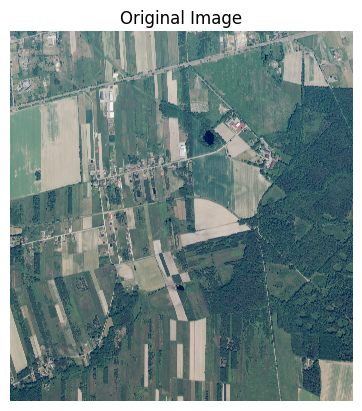

In [123]:
import cv2
import matplotlib.pyplot as plt

# Example test image path
sample_image_path = '/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main1/data/images/N-34-140-A-d-3-4.tif'

# Read and preprocess
test_image = cv2.imread(sample_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [124]:
import numpy as np
from torchvision import transforms

# Apply same preprocessing as training
normalized_image = normalization_function(test_image)
input_tensor = torch.from_numpy(normalized_image).permute(2, 0, 1).unsqueeze(0).float().to('cuda')


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3795232684.py", line 9, in <cell line: 0>
    get_ipython().run_line_magic('cd', '/content')
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occ

In [131]:
!pip install efficientnet_pytorch


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 4, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [134]:
import torch
import segmentation_models_pytorch as smp
import gc
from collections import OrderedDict

# ============================================================
# GPU memory cleanup
# ============================================================
torch.cuda.empty_cache()
gc.collect()

# ============================================================
# 1. Recreate the architecture used during training
# ============================================================
model = smp.Unet(
    encoder_name="efficientnet-b0",
    encoder_weights=None,  # no pretrained ImageNet weights
    in_channels=3,
    classes=4              # must match training
)

# ============================================================
# 2. Load checkpoint safely
# ============================================================
pretrained_model_path = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/CP_epoch30.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load checkpoint
checkpoint = torch.load(pretrained_model_path, map_location=device)

# Detect checkpoint type
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    state_dict = checkpoint["model_state_dict"]
    epoch = checkpoint.get("epoch", "unknown")
    best_iou = checkpoint.get("best_iou", "N/A")
else:
    # plain weights file (state_dict only)
    state_dict = checkpoint
    epoch = "unknown"
    best_iou = "N/A"

# Handle DataParallel prefixes
if any(k.startswith("module.") for k in state_dict.keys()):
    state_dict = OrderedDict((k.replace("module.", ""), v) for k, v in state_dict.items())

# Load weights
model.load_state_dict(state_dict, strict=False)

# ============================================================
# 3. Move to GPU and eval mode
# ============================================================
model = model.to(device)
model.eval()

print("✅ Model successfully restored!")
print(f"Loaded from epoch: {epoch} | best IoU: {best_iou}")

# ============================================================
# 4. Patch-based prediction helper
# ============================================================
def predict_large_image(input_tensor, model, patch_size=256, overlap=32):
    """
    Predict large image by processing it in overlapping patches.
    Returns the stitched output tensor.
    """
    _, _, h, w = input_tensor.shape
    output = torch.zeros((1, 4, h, w), device=device)
    count = torch.zeros((1, 1, h, w), device=device)

    step = patch_size - overlap
    with torch.no_grad():
        for i in range(0, h, step):
            for j in range(0, w, step):
                i_end = min(i + patch_size, h)
                j_end = min(j + patch_size, w)

                if i_end - i < patch_size:
                    i = max(0, i_end - patch_size)
                if j_end - j < patch_size:
                    j = max(0, j_end - patch_size)

                patch = input_tensor[:, :, i:i_end, j:j_end].to(device)
                pred_patch = model(patch)

                output[:, :, i:i_end, j:j_end] += pred_patch
                count[:, :, i:i_end, j:j_end] += 1

    output /= count
    return output

# ============================================================
# 5. Example usage with any input_tensor
# ============================================================
try:
    # Assume input_tensor already prepared: shape [1, 3, H, W]
    # e.g., input_tensor = preprocess_image("path/to/image.jpg")

    with torch.no_grad():
        if input_tensor.shape[2] > 512 or input_tensor.shape[3] > 512:
            print("Large input detected, using patch-based prediction...")
            predicted_mask = predict_large_image(input_tensor, model, patch_size=256, overlap=32)
        else:
            input_tensor = input_tensor.to(device)
            predicted_mask = model(input_tensor)

    predicted_mask = predicted_mask.squeeze().cpu().numpy()
    print("Prediction shape:", predicted_mask.shape)

except RuntimeError as e:
    print(f"❌ Memory error: {e}")
    print("Try reducing patch size or input dimensions")


✅ Model successfully restored!
Loaded from epoch: unknown | best IoU: N/A
Large input detected, using patch-based prediction...
Prediction shape: (4, 9579, 8885)


In [135]:
predicted_mask = np.argmax(predicted_mask, axis=0)


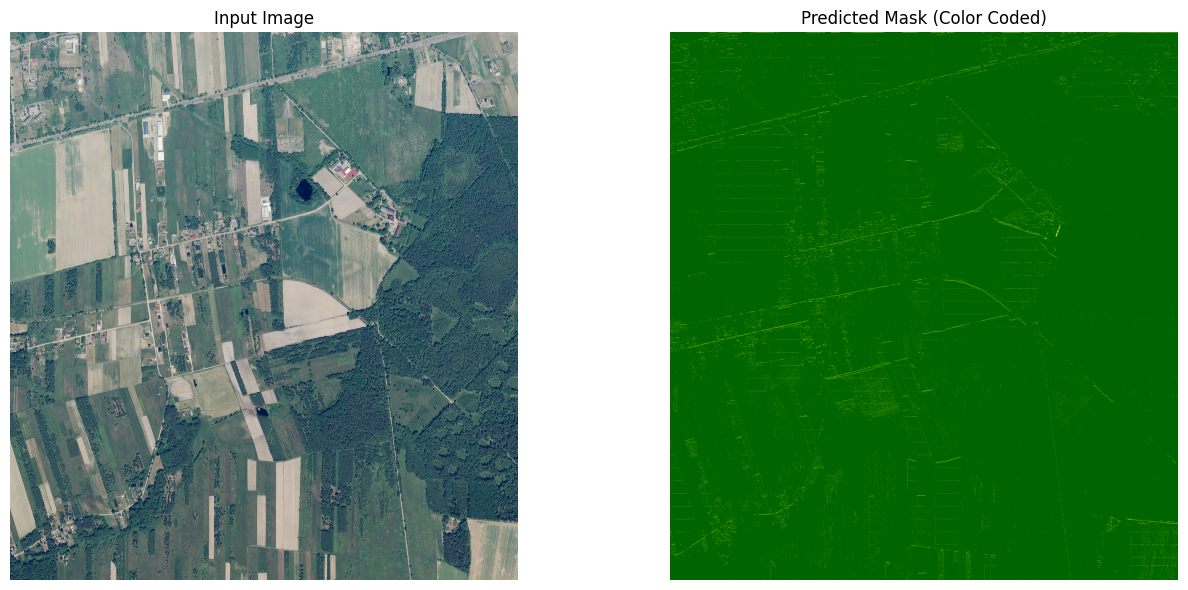

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Optional: if your tensors are PyTorch tensors, convert to NumPy
if torch.is_tensor(test_image):
    test_image = test_image.detach().cpu().permute(1, 2, 0).numpy()

if torch.is_tensor(predicted_mask):
    predicted_mask = predicted_mask.detach().cpu().numpy()

# Optional: if mask has shape (C,H,W) with probabilities — convert to class indices
if predicted_mask.ndim == 3:
    predicted_mask = np.argmax(predicted_mask, axis=0)

# Define class colors for better visualization (DeepGlobe style)
# Urban, Agriculture, Rangeland, Forest, Water, Barren, Unknown
colors = np.array([
    [128, 128, 128],  # Urban
    [255, 255, 0],    # Agriculture
    [144, 238, 144],  # Rangeland
    [0, 100, 0],      # Forest
    [0, 0, 255],      # Water
    [139, 69, 19],    # Barren
    [0, 0, 0]         # Unknown
], dtype=np.uint8)

# Convert mask (H,W) to RGB
mask_rgb = colors[predicted_mask]

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(test_image)
plt.title("Input Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask_rgb)
plt.title("Predicted Mask (Color Coded)")
plt.axis('off')

plt.tight_layout()
plt.show()


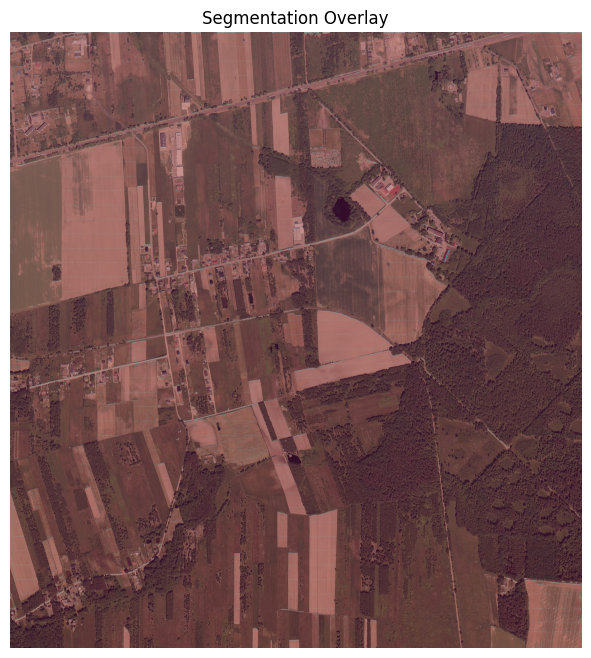

In [137]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

# 1️⃣ Convert to NumPy and take argmax if model output is logits
if isinstance(predicted_mask, torch.Tensor):
    predicted_mask = torch.argmax(predicted_mask, dim=1).squeeze().cpu().numpy()

# 2️⃣ Ensure (H, W) format and uint8 dtype
predicted_mask = np.squeeze(predicted_mask).astype(np.uint8)

# 3️⃣ Normalize mask for colormap (handle already-encoded masks cleanly)
mask_max = predicted_mask.max()
if mask_max == 0:
    pred_mask_uint8 = predicted_mask
elif mask_max <= 1:
    pred_mask_uint8 = (predicted_mask * 255).astype(np.uint8)
else:
    pred_mask_uint8 = (predicted_mask * (255.0 / mask_max)).astype(np.uint8)

# 4️⃣ Apply colormap for visualization
colored_segmentation = cv2.applyColorMap(pred_mask_uint8, cv2.COLORMAP_JET)
colored_segmentation = cv2.cvtColor(colored_segmentation, cv2.COLOR_BGR2RGB)

# 5️⃣ Normalize and resize input image if needed
if test_image.dtype != np.uint8:
    test_image = (test_image * 255).astype(np.uint8)
if test_image.shape[:2] != colored_segmentation.shape[:2]:
    overlay_image = cv2.resize(test_image, (colored_segmentation.shape[1], colored_segmentation.shape[0]))
else:
    overlay_image = test_image

# 6️⃣ Blend
blended_result = cv2.addWeighted(overlay_image, 0.6, colored_segmentation, 0.4, 0)

# 7️⃣ Display
plt.figure(figsize=(8, 8))
plt.imshow(blended_result)
plt.title("Segmentation Overlay")
plt.axis('off')
plt.show()


In [154]:
import torch
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.utils import metrics, losses
from collections import OrderedDict
import gc

# --- GPU memory cleanup ---
torch.cuda.empty_cache()
gc.collect()

# ============================================================
# 1. Recreate the architecture used during training
# ============================================================
model = smp.Unet(
    encoder_name="efficientnet-b0",
    encoder_weights=None,
    in_channels=3,
    classes=4
)

# ============================================================
# 2. Load checkpoint safely (works for both full & raw weights)
# ============================================================
pretrained_model_path = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/CP_epoch30.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

checkpoint = torch.load(pretrained_model_path, map_location=device)

# Detect whether it's a full checkpoint or weights-only
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    state_dict = checkpoint["model_state_dict"]
    epoch = checkpoint.get("epoch", "unknown")
    best_iou = checkpoint.get("best_iou", "N/A")
else:
    state_dict = checkpoint
    epoch = "unknown"
    best_iou = "N/A"

# Handle DataParallel prefix if necessary
if any(k.startswith("module.") for k in state_dict.keys()):
    state_dict = OrderedDict((k.replace("module.", ""), v) for k, v in state_dict.items())

# Load weights
model.load_state_dict(state_dict, strict=False)

# ============================================================
# 3. Setup device, optimizer, and training utilities
# ============================================================
COMPUTE_DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(COMPUTE_DEVICE)
model_optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

print(f"✅ Model loaded successfully!")
print(f"Loaded from epoch: {epoch}")
print(f"Previous best IoU: {best_iou}")

# ============================================================
# 4. Define loss and metrics
# ============================================================
combined_loss = losses.DiceLoss() + losses.CrossEntropyLoss()

evaluation_metrics = [
    metrics.IoU(threshold=0.5),
    metrics.Fscore(threshold=0.5),
    metrics.Precision(threshold=0.5),
    metrics.Recall(threshold=0.5),
]

# ============================================================
# 5. Create training/validation epoch runners
# ============================================================
training_epoch = smp.utils.train.TrainEpoch(
    model=model,
    loss=combined_loss,
    metrics=evaluation_metrics,
    optimizer=model_optimizer,
    device=COMPUTE_DEVICE,
    verbose=True,
)

validation_epoch = smp.utils.train.ValidEpoch(
    model=model,
    loss=combined_loss,
    metrics=evaluation_metrics,
    device=COMPUTE_DEVICE,
    verbose=True,
)

print("✅ Training setup complete and ready for use!")


✅ Model loaded successfully!
Loaded from epoch: unknown
Previous best IoU: N/A
✅ Training setup complete and ready for use!


Selected test image: /content/drive/MyDrive/patches_512/images/N-34-140-A-d-4-2_patch_14_0.tif


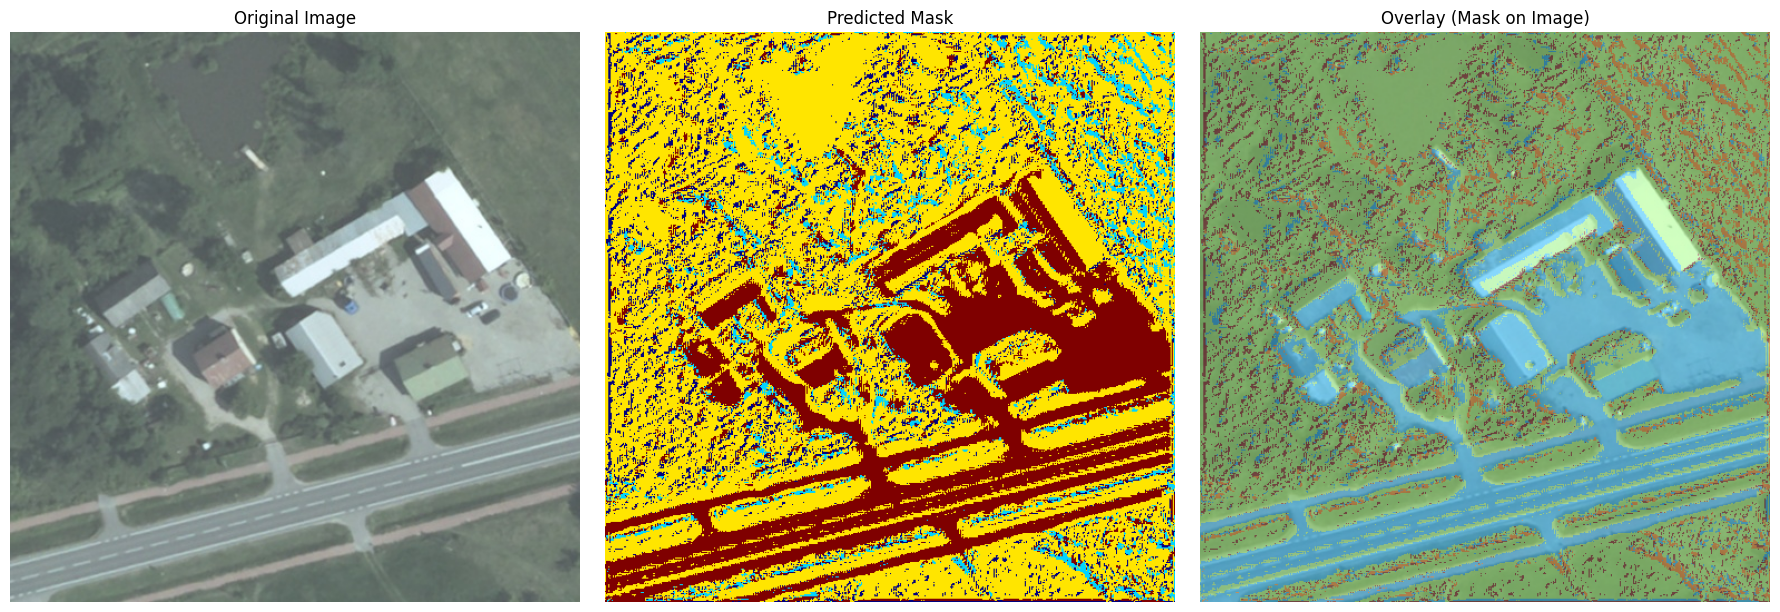

In [152]:
import os, random, cv2, torch, numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp

# --- Model encoder info ---
ENCODER = "efficientnet-b0"
ENCODER_WEIGHTS = "imagenet"
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

# --- Device ---
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# --- Path to image patches ---
patches_dir = "/content/drive/MyDrive/patches_512/images"

# Pick a random image
img_files = [f for f in os.listdir(patches_dir) if f.endswith('.tif')]
test_img_path = os.path.join(patches_dir, random.choice(img_files))
print("Selected test image:", test_img_path)

# --- Load image safely ---
image = cv2.imread(test_img_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {test_img_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Preprocess same as training ---
preprocessed = preprocessing_fn(image)
x_tensor = torch.from_numpy(preprocessed).permute(2,0,1).unsqueeze(0).float().to(DEVICE)

# --- Inference ---
model.eval()
with torch.no_grad():
    pr_mask = model(x_tensor)

# --- Postprocess prediction ---
pr_mask = pr_mask.squeeze().cpu().numpy()
pr_mask = np.argmax(pr_mask, axis=0)

# --- Create overlay ---
color_mask = cv2.applyColorMap((pr_mask * 60).astype(np.uint8), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(image, 0.6, color_mask, 0.4, 0)

# --- Display ---
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(image); plt.title('Original Image'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(pr_mask, cmap='jet'); plt.title('Predicted Mask'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(overlay); plt.title('Overlay (Mask on Image)'); plt.axis('off')
plt.tight_layout(); plt.show()


In [144]:
import torch
import segmentation_models_pytorch as smp
from collections import OrderedDict

COMPUTE_DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------------------------------------
# 1. Recreate the same model architecture used in training
# ------------------------------------------------------------
inference_model = smp.Unet(
    encoder_name="efficientnet-b0",
    encoder_weights=None,
    in_channels=3,
    classes=4
)

# ------------------------------------------------------------
# 2. Load the checkpoint safely
# ------------------------------------------------------------
pretrained_model_filepath = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/CP_epoch30.pth'

# Load checkpoint
checkpoint = torch.load(pretrained_model_filepath, map_location=COMPUTE_DEVICE)

# Detect whether it's a full checkpoint or just weights
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    state_dict = checkpoint["model_state_dict"]
    epoch = checkpoint.get("epoch", "unknown")
    best_iou = checkpoint.get("best_iou", "N/A")
else:
    # File only contains model weights
    state_dict = checkpoint
    epoch = "unknown"
    best_iou = "N/A"

# ------------------------------------------------------------
# 3. Handle DataParallel checkpoints
# ------------------------------------------------------------
if any(k.startswith("module.") for k in state_dict.keys()):
    state_dict = OrderedDict((k.replace("module.", ""), v) for k, v in state_dict.items())

# ------------------------------------------------------------
# 4. Load weights and prepare for inference
# ------------------------------------------------------------
inference_model.load_state_dict(state_dict, strict=False)
inference_model = inference_model.to(COMPUTE_DEVICE)
inference_model.eval()

print("Model architecture rebuilt and weights loaded successfully!")
print(f"Loaded from epoch: {epoch}")
print(f"Best IoU (if recorded): {best_iou}")


Model architecture rebuilt and weights loaded successfully!
Loaded from epoch: unknown
Best IoU (if recorded): N/A


In [145]:
# Run this once after loading full model
model_weights_filepath = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/CP_epoch30.pth'

torch.save(inference_model.state_dict(), model_weights_filepath)


In [146]:
weights_path = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/CP_epoch30.pth'

model = smp.Unet(
    encoder_name='efficientnet-b0',
    encoder_weights=None,
    classes=4,              # adjust to 6 if needed
    activation='softmax2d'
).to(DEVICE)

model.load_state_dict(torch.load(weights_path, map_location=DEVICE))
model.eval()

print("Model loaded and ready for inference!")


Model loaded and ready for inference!


In [147]:
%matplotlib inline
import matplotlib.pyplot as plt


In [148]:
plt.show(block=False)
plt.pause(0.1)


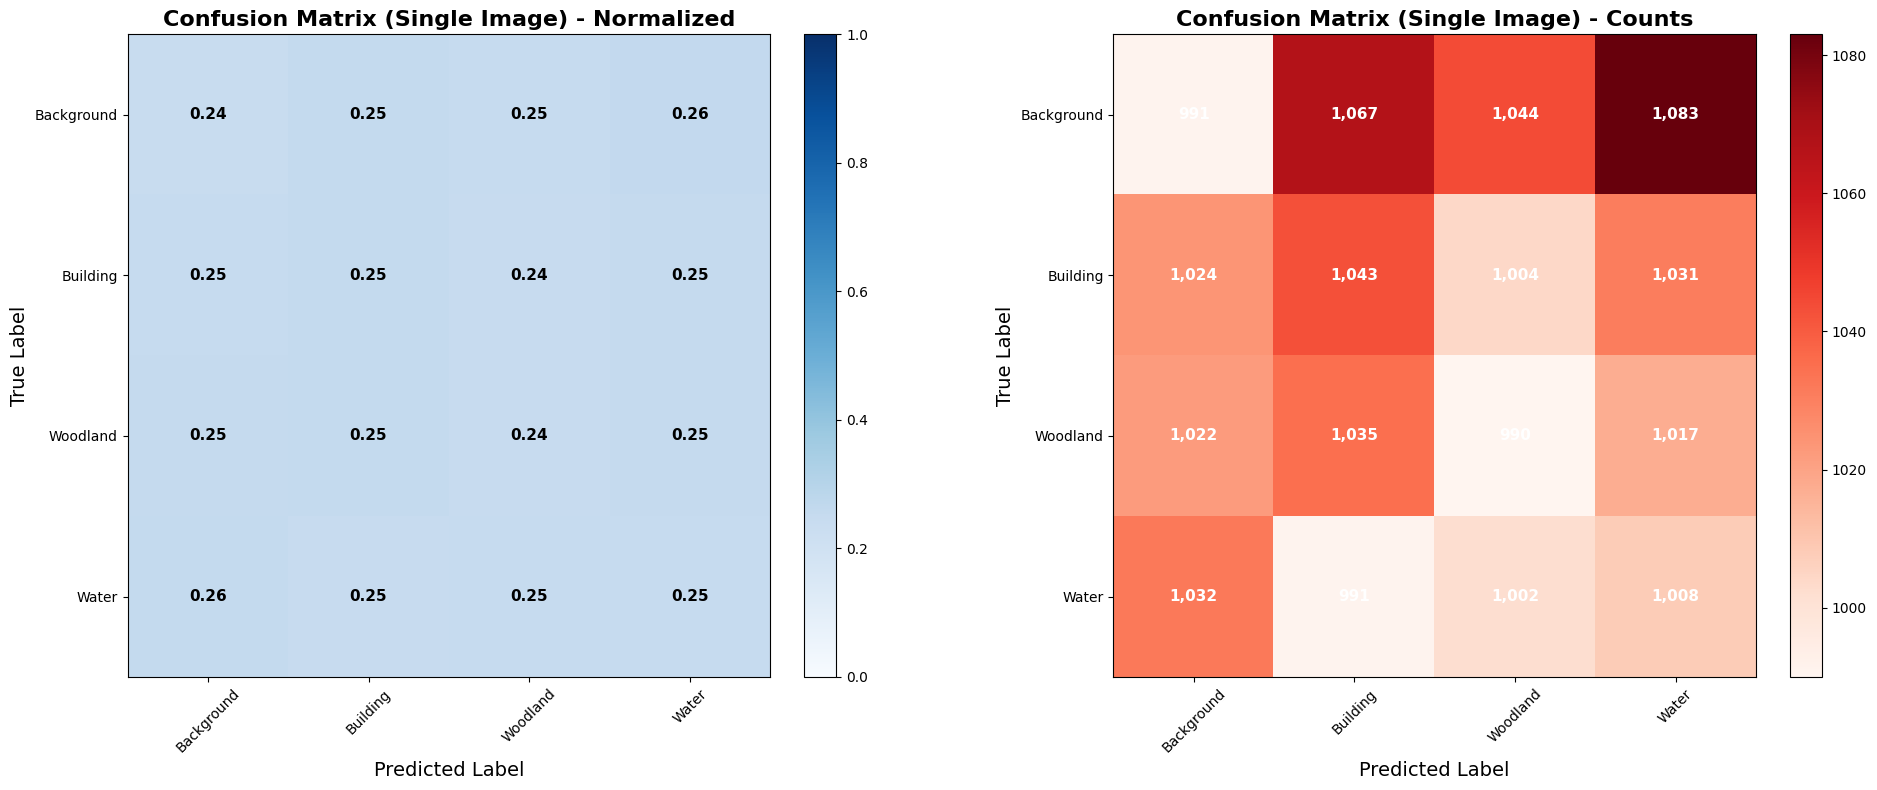

======================== CONFUSION MATRIX ANALYSIS ========================

Overall Accuracy: 0.2461

Class-wise Performance:
---------------------------------------------------------------------------
Class           | Precision |    Recall |       IoU |        F1 |   Support
---------------------------------------------------------------------------
Background      |    0.2435 |    0.2368 |    0.1364 |    0.2401 |     4,185
Building        |    0.2522 |    0.2543 |    0.1450 |    0.2532 |     4,102
Woodland        |    0.2450 |    0.2436 |    0.1392 |    0.2443 |     4,064
Water           |    0.2435 |    0.2499 |    0.1407 |    0.2467 |     4,033


In [149]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣  Manual Confusion Matrix
# -----------------------------
def manual_confusion_matrix(y_true, y_pred, num_classes):
    """
    Manual implementation of confusion matrix (no sklearn)
    """
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    cm = np.zeros((num_classes, num_classes), dtype=np.int64)

    # Build matrix
    for t, p in zip(y_true_flat, y_pred_flat):
        if 0 <= t < num_classes and 0 <= p < num_classes:
            cm[t, p] += 1
    return cm


# -----------------------------
# 2️⃣  Compute Single-Image Matrix
# -----------------------------
def compute_confusion_matrix_analysis(y_true, y_pred, class_names):
    """Compute confusion matrix for one image"""
    num_classes = len(class_names)
    return manual_confusion_matrix(y_true, y_pred, num_classes)


# -----------------------------
# 3️⃣  Visualization & Metrics
# -----------------------------
def plot_confusion_matrix_analysis(cm, class_names, title='Confusion Matrix Analysis'):
    """Plot normalized + raw confusion matrix and print stats"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Normalize
    cm_normalized = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-8)

    # --- Plot normalized ---
    im1 = ax1.imshow(cm_normalized, cmap='Blues', vmin=0, vmax=1)
    ax1.set_title(f'{title} - Normalized', fontsize=16, fontweight='bold')
    ax1.set_xticks(np.arange(len(class_names)))
    ax1.set_yticks(np.arange(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45)
    ax1.set_yticklabels(class_names)
    ax1.set_xlabel('Predicted Label', fontsize=14)
    ax1.set_ylabel('True Label', fontsize=14)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax1.text(j, i, f'{cm_normalized[i, j]:.2f}',
                     ha='center', va='center',
                     color='white' if cm_normalized[i, j] > 0.5 else 'black',
                     fontsize=11, fontweight='bold')

    # --- Plot raw counts ---
    im2 = ax2.imshow(cm, cmap='Reds')
    ax2.set_title(f'{title} - Counts', fontsize=16, fontweight='bold')
    ax2.set_xticks(np.arange(len(class_names)))
    ax2.set_yticks(np.arange(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45)
    ax2.set_yticklabels(class_names)
    ax2.set_xlabel('Predicted Label', fontsize=14)
    ax2.set_ylabel('True Label', fontsize=14)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax2.text(j, i, f'{cm[i, j]:,}',
                     ha='center', va='center',
                     color='white' if cm[i, j] > cm.max()/2 else 'black',
                     fontsize=11, fontweight='bold')

    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

    # --- Derived Metrics ---
    print("="*75)
    print(" CONFUSION MATRIX ANALYSIS ".center(75, "="))
    print("="*75)

    accuracy = np.diag(cm).sum() / (cm.sum() + 1e-8)
    precision = np.diag(cm) / (cm.sum(axis=0) + 1e-8)
    recall = np.diag(cm) / (cm.sum(axis=1) + 1e-8)
    iou = np.diag(cm) / (cm.sum(axis=1) + cm.sum(axis=0) - np.diag(cm) + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    print(f"\nOverall Accuracy: {accuracy:.4f}")
    print("\nClass-wise Performance:")
    print("-"*75)
    print(f"{'Class':15} | {'Precision':>9} | {'Recall':>9} | {'IoU':>9} | {'F1':>9} | {'Support':>9}")
    print("-"*75)

    for i, c in enumerate(class_names):
        print(f"{c:15} | {precision[i]:9.4f} | {recall[i]:9.4f} | {iou[i]:9.4f} | {f1[i]:9.4f} | {cm.sum(axis=1)[i]:9,d}")

    print("="*75)


# -----------------------------
# 4️⃣  Batch-level Aggregation
# -----------------------------
def compute_batch_confusion_matrix(y_true_list, y_pred_list, class_names):
    """Aggregate confusion matrices across multiple images"""
    total_cm = np.zeros((len(class_names), len(class_names)), dtype=np.int64)
    for yt, yp in zip(y_true_list, y_pred_list):
        total_cm += compute_confusion_matrix_analysis(yt, yp, class_names)
    return total_cm


# -----------------------------
# 5️⃣  Example Usage
# -----------------------------
if __name__ == "__main__":
    # Example random data to test functionality
    y_true = np.random.randint(0, 4, (128, 128))
    y_pred = np.random.randint(0, 4, (128, 128))
    class_names = ['Background', 'Building', 'Woodland', 'Water']

    cm = compute_confusion_matrix_analysis(y_true, y_pred, class_names)
    plot_confusion_matrix_analysis(cm, class_names, title="Confusion Matrix (Single Image)")

    # Example for multiple masks
    # y_true_list = [y_true1, y_true2, ...]
    # y_pred_list = [y_pred1, y_pred2, ...]
    # batch_cm = compute_batch_confusion_matrix(y_true_list, y_pred_list, class_names)
    # plot_confusion_matrix_analysis(batch_cm, class_names, title="Batch Confusion Matrix")


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

class SegmentationMetrics:
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def compute_confusion_matrix(self, y_true, y_pred):
        """
        Compute confusion matrix for segmentation

        Args:
            y_true: Ground truth masks (H, W) or (N, H, W)
            y_pred: Predicted masks (H, W) or (N, H, W)

        Returns:
            cm: Confusion matrix (num_classes, num_classes)
        """
        # Flatten arrays if they are 2D/3D
        y_true_flat = y_true.flatten()
        y_pred_flat = y_pred.flatten()

        # Compute confusion matrix
        cm = confusion_matrix(y_true_flat, y_pred_flat,
                            labels=np.arange(self.num_classes))
        return cm

    def plot_confusion_matrix(self, cm, class_names=None, normalize=True,
                            title='Confusion Matrix', cmap=plt.cm.Blues):
        """
        Plot confusion matrix

        Args:
            cm: Confusion matrix from compute_confusion_matrix
            class_names: List of class names
            normalize: Whether to normalize the matrix
            title: Plot title
            cmap: Color map
        """
        if class_names is None:
            class_names = [f'Class {i}' for i in range(self.num_classes)]

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            fmt = '.2f'
            title += ' (Normalized)'
        else:
            fmt = 'd'
            title += ' (Counts)'

        plt.figure(figsize=(10, 8))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, fontsize=16)
        plt.colorbar()

        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        # Add text annotations
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=12)

        plt.ylabel('True Label', fontsize=14)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.tight_layout()
        plt.show()

    def compute_iou(self, y_true, y_pred, class_idx):
        """
        Compute Intersection over Union for a specific class

        Args:
            y_true: Ground truth mask
            y_pred: Predicted mask
            class_idx: Class index to compute IoU for

        Returns:
            iou: IoU score for the class
        """
        # Create binary masks for the class
        true_binary = (y_true == class_idx)
        pred_binary = (y_pred == class_idx)

        # Calculate intersection and union
        intersection = np.logical_and(true_binary, pred_binary).sum()
        union = np.logical_or(true_binary, pred_binary).sum()

        # Avoid division by zero
        if union == 0:
            return 0.0

        iou = intersection / union
        return iou

    def compute_iou_per_class(self, y_true, y_pred):
        """
        Compute IoU for all classes

        Returns:
            iou_scores: Dictionary with IoU for each class
        """
        iou_scores = {}
        for class_idx in range(self.num_classes):
            iou = self.compute_iou(y_true, y_pred, class_idx)
            iou_scores[class_idx] = iou
        return iou_scores

    def compute_mean_iou(self, y_true, y_pred):
        """
        Compute mean Intersection over Union across all classes

        Returns:
            mean_iou: mIoU score
        """
        iou_scores = self.compute_iou_per_class(y_true, y_pred)
        mean_iou = np.mean(list(iou_scores.values()))
        return mean_iou, iou_scores

    def compute_batch_metrics(self, y_true_list, y_pred_list):
        """
        Compute metrics for a batch of images

        Args:
            y_true_list: List of ground truth masks
            y_pred_list: List of predicted masks

        Returns:
            metrics: Dictionary with all computed metrics
        """
        batch_cm = np.zeros((self.num_classes, self.num_classes))
        batch_iou_per_class = {i: [] for i in range(self.num_classes)}

        for y_true, y_pred in zip(y_true_list, y_pred_list):
            # Update confusion matrix
            cm = self.compute_confusion_matrix(y_true, y_pred)
            batch_cm += cm

            # Update IoU scores
            iou_scores = self.compute_iou_per_class(y_true, y_pred)
            for class_idx, iou in iou_scores.items():
                batch_iou_per_class[class_idx].append(iou)

        # Compute mean metrics across batch
        mean_iou_per_class = {k: np.mean(v) for k, v in batch_iou_per_class.items()}
        overall_miou = np.mean(list(mean_iou_per_class.values()))

        metrics = {
            'confusion_matrix': batch_cm,
            'iou_per_class': mean_iou_per_class,
            'mean_iou': overall_miou,
            'batch_iou_per_class': batch_iou_per_class
        }

        return metrics

# Example usage with your land cover classes
class_names = ['Background', 'Building', 'Woodland', 'Water']

# Initialize metrics calculator
metrics_calculator = SegmentationMetrics(num_classes=4)

# Example with single image
def evaluate_single_image(y_true, y_pred, class_names):
    """Evaluate metrics for a single image"""
    # Compute confusion matrix
    cm = metrics_calculator.compute_confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    metrics_calculator.plot_confusion_matrix(cm, class_names=class_names)

    # Compute IoU metrics
    miou, iou_scores = metrics_calculator.compute_mean_iou(y_true, y_pred)

    # Print results
    print("IoU per class:")
    for class_idx, class_name in enumerate

SyntaxError: expected ':' (ipython-input-3670327444.py, line 184)